### EDA

In [1]:
# imports
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from  nltk.stem import PorterStemmer

In [2]:
# initialize db connection
db_con = sqlite3.connect('../../part-02/data/yelp.db.sqlite')

In [3]:
# initialize dataframe
reviews = pd.DataFrame(pd.read_sql('select * from reviews;',
           con=db_con))

In [4]:

# boxplot function
def box_plot(df, column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('pink', 8))
    
    ax2.hist(df[column_name], color='pink', 
             orientation='horizontal')
    ax1.set_title(column_name, fontsize=16)
    ax2.set_title(column_name, fontsize=16)
    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

### Review the data

In [5]:
# visualize first 5 records
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,target,num_words,num_chars
0,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,0,0,0,First time there and it was excellent It feels...,2017-02-19 13:32:05,0,39,212
1,dQ3EU6cevDqHAr_ygy1O8A,CNyXcn0c0V5CFmigqqw-Xg,oY5LFo6Yxxf32ePna6mEUQ,5,1,0,0,I absolutely love this place Great hours impe...,2014-12-30 17:55:51,1,12,70
2,Pgh9POx-bH7JFggKXqXWMQ,8fL5qUckzt_nAC1uwvbr0w,uW8L6awmCyjovD9OhWPo7g,5,1,0,1,As far as I know this is the best video rental...,2008-04-30 15:49:16,1,72,360
3,Sgs-rER85vBaOBSPVo96xw,EIi4Fy_JW_6v7DaRDet1uw,Q1HHAb4FzrzfnnrRyA8fgg,4,0,0,0,Great atmosphere and service I dont know how o...,2015-07-28 14:26:48,0,71,320
4,yqJv_8CoXNb-NpaEiTY4yw,ZiI40HVbRbFE-tv2K8OQkw,45siW2fI0Cuv5ZKCS23knA,5,0,0,0,Great new location on Central Great staff and ...,2014-04-19 13:06:28,0,20,114


In [6]:
# check shape
reviews.shape

(21032, 12)

In [7]:
# check columns
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'target', 'num_words', 'num_chars'],
      dtype='object')

### Summary statistics

In [8]:
# descriptive statistics
reviews.stars.describe()

count    21032.000000
mean         3.747147
std          1.485500
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [9]:
# skewness of data
reviews.stars.skew()

-0.8462207629580617

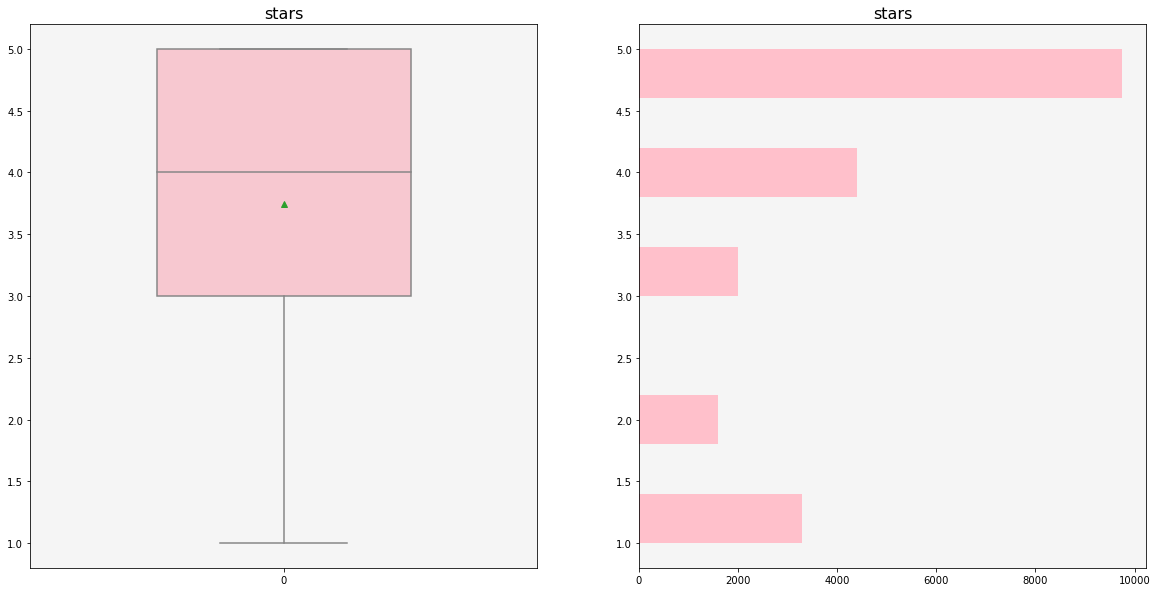

In [10]:
# visualize the data
box_plot(reviews, 'stars')

The 'stars' column shows moderate negative skew.  The median and mean are separated by 1, and the spread through the IQR is relatively large.

In [11]:
# descriptive statistics
reviews.useful.describe()

count    21032.000000
mean         1.195036
std          6.651468
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        840.000000
Name: useful, dtype: float64

In [12]:
# skewness of data
reviews.useful.skew()

100.26511356897612

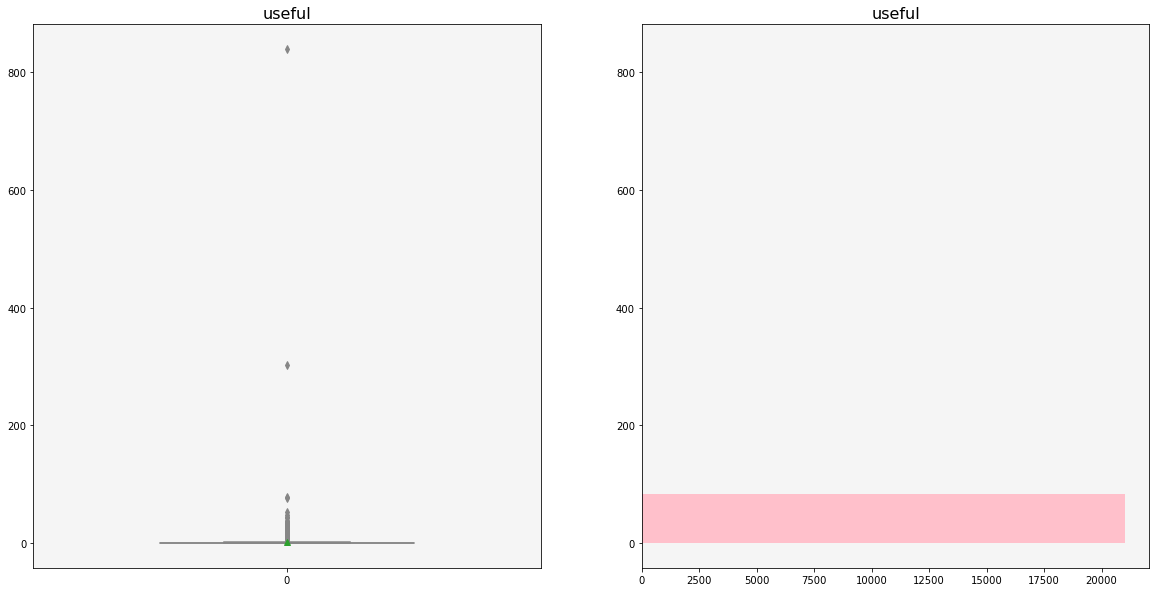

In [13]:
# visualize the data
box_plot(reviews, 'useful')

(Note: this was the column that the target was created from.  All values of zero got assigned zero, and every other value got assigned a one.)

This data is extremely positively skewed, and requires outliers to be addressed.  Investigating the data, it looks like reviews with 'useful' greater than 100 can be dropped. The median is 0 and mean is 1.20.  The outliers are heavily impacting the IQR.

In [14]:
# descriptive statistics
reviews.funny.describe()

count    21032.000000
mean         0.311192
std          1.175694
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: funny, dtype: float64

In [15]:
# sknewness of data
reviews.funny.skew()

9.845942231214517

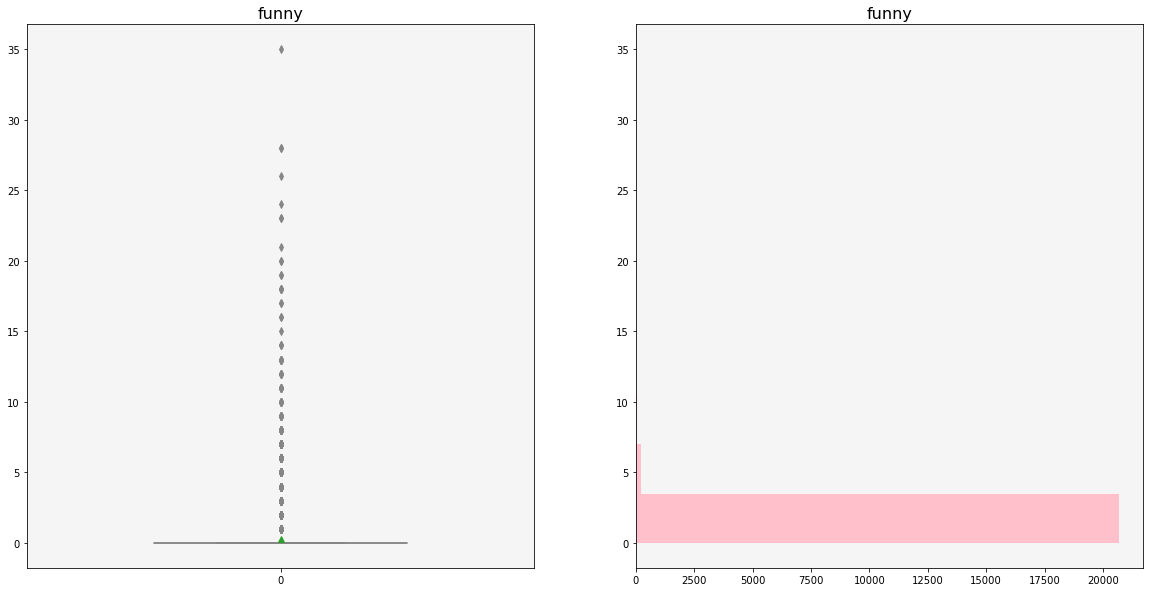

In [16]:
# visualize the data
box_plot(reviews, 'funny')

Similary to the useful column, the funny column shows extensive positive skew, though the outlier range is less expansive than the 'useful' column.  I have elected to not deal with the outliers in this instance, as most of the values are zero. Instead, I will drop the column. 

The mean is 0.31, and the median is 0.  The spread is very small through the IQR, with outliers contributing to the larger area of spread.  

In [17]:
# descriptive statistics
reviews.cool.describe()

count    21032.000000
mean         0.484880
std          2.717127
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        303.000000
Name: cool, dtype: float64

In [18]:
# skewness of data
reviews.cool.skew()

69.6692554361721

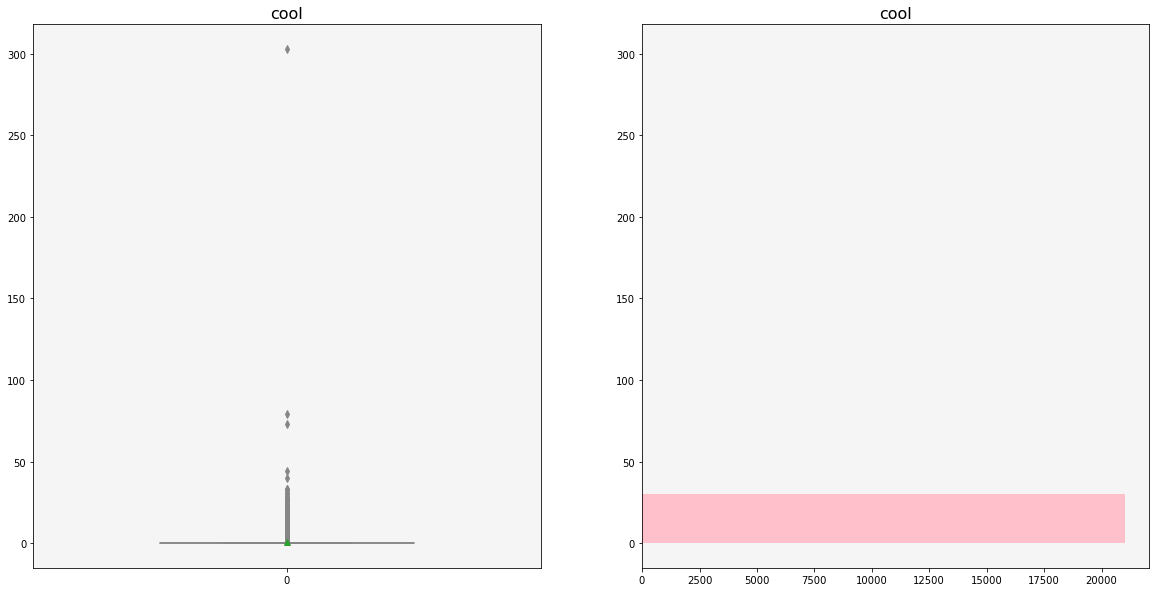

In [19]:
# visualize the data
box_plot(reviews, 'cool')

Similarly to the 'funny' column, the data is heavily positively skewed, with most of the values being zero.  I have elected to not deal with the outliers in this instance. Instead I will drop the column. 



In [20]:
# descriptive statistics
reviews.num_words.describe()

count    21032.000000
mean       108.575076
std        102.135081
min          1.000000
25%         43.000000
50%         77.000000
75%        138.000000
max       1002.000000
Name: num_words, dtype: float64

In [21]:
# skewness of data
reviews.num_words.skew()

2.7248802511452985

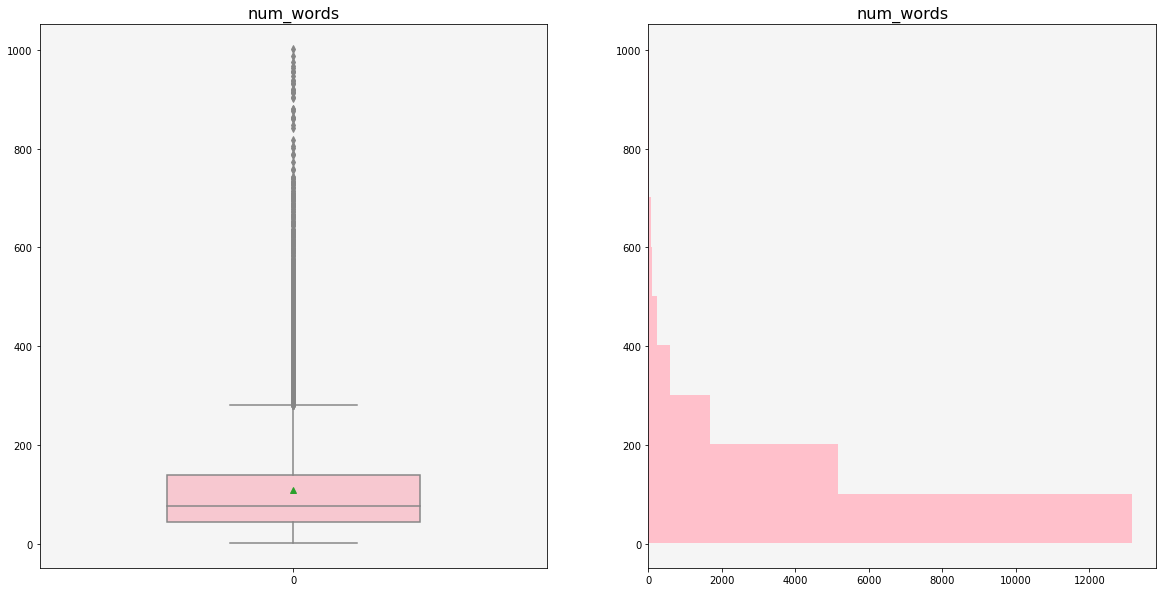

In [22]:
# visualize the data
box_plot(reviews, 'num_words')

The mean and median are offset from each other by some degree, and the spread through the IQR is fairly small.  The data is highly positively skewed.  There are outliers which need to be dealth with, so I'm going to drop numbers of words that are > 600.

In [23]:
# summary statistics
reviews.num_chars.describe()

count    21032.000000
mean       555.283853
std        516.577952
min          8.000000
25%        223.000000
50%        396.000000
75%        707.000000
max       4868.000000
Name: num_chars, dtype: float64

In [24]:
reviews.num_chars.skew()

2.7359704121219197

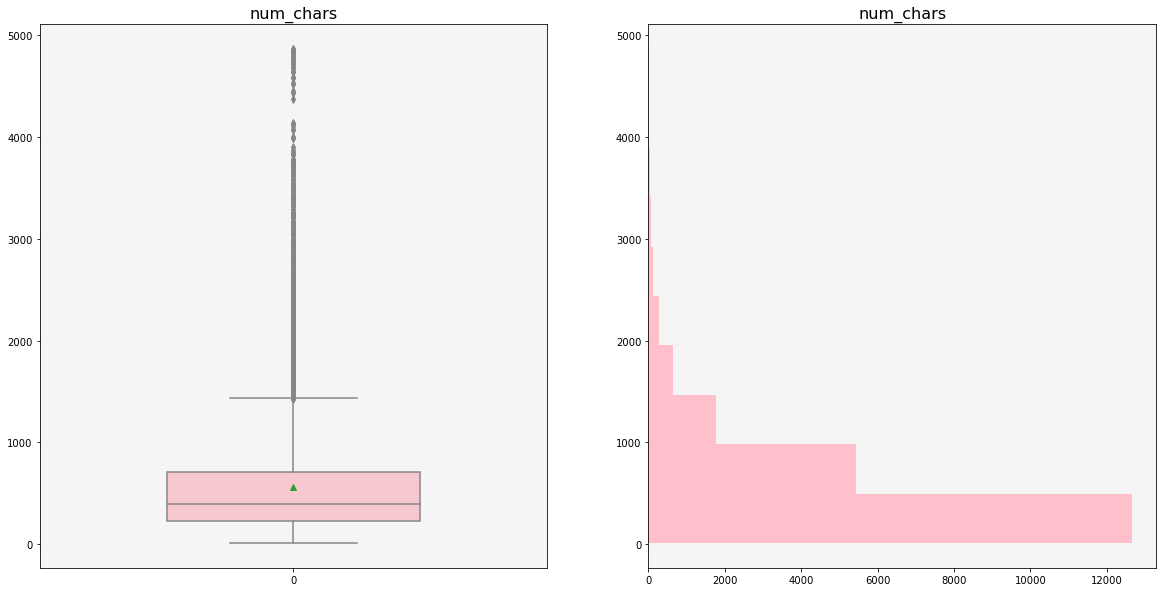

In [25]:
box_plot(reviews, 'num_chars')

The num_chars shows heavy positive skew, with outliers above 2,500.  The mean is 555.28, and the median is 396.00, which shows heavy offset.  The spread through the IQR is fairly small, with those outliers mentioned skewing the data.  

### Data clean up
(After reviewing the summary statistics and visualizaing the data)

In [26]:
# drop columns that have too many zero values
reviews.drop(['funny', 'cool'], axis=1, inplace=True)

In [27]:
# drop useful with values greater than 100
reviews.drop(reviews[reviews.useful > 100].index, 
             inplace=True)

In [28]:
# drop num_words that are greater than 600
reviews[reviews.num_words < 600]
reviews.drop(reviews[reviews.num_words > 600].index, 
             inplace=True)

In [29]:
# drop num_chars that are greater than 2,500
reviews[reviews.num_chars < 2500]
reviews.drop(reviews[reviews.num_chars > 2500].index, 
             inplace=True)

In [30]:
# reset index
reviews.reset_index(inplace=True, drop=True)


### Export data

In [31]:
# export clean data to csv
reviews.to_csv('../../part-02/data/yelp_cleaned.csv',
               index=False)

In [32]:
# import data to db
reviews.to_sql(
    'reviews_cleaned',
    con=db_con,
    if_exists = 'replace',
    index=False
    )

In [33]:
# check numbers of rows in db
pd.read_sql('select count(*) as count from reviews_cleaned;',
           con=db_con)

,count
0,20789


### Word vectors

In [34]:
# stem the reviews
stemmer = PorterStemmer()
reviews.text = reviews.text.apply(lambda x: stemmer.stem(x))

In [35]:
# instantiate vectorizer
tvec = TfidfVectorizer(stop_words = 'english',
                       strip_accents = 'ascii',
                       max_features = 50,
                       max_df = .60,
                       norm = 'l2'
                      )
tvec.fit(reviews.text)

TfidfVectorizer(max_df=0.6, max_features=50, stop_words='english',
                strip_accents='ascii')

In [36]:
# create vectorized dataframe
reviews_vectorized = pd.DataFrame(tvec.transform(reviews.text).todense(),
                  columns = tvec.get_feature_names())

In [37]:
# visualize the tokens
reviews_vectorized.head()

,amazing,area,bar,best,came,chicken,come,day,definitely,delicious,...,restaurant,right,said,service,staff,time,try,wait,way,went
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.434129,0.0,0.411026,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.327505,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.64235,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.324895,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.27631,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.222406,0.000000,0.234791,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.421415,0.000000,0.0,0.0,0.0,0.0


In [38]:
# get column names for tokens
vector_cols = list(reviews_vectorized.columns)

In [39]:
reviews_vectorized[vector_cols[0]].describe()

count    20789.000000
mean         0.043194
std          0.137532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: amazing, dtype: float64

In [40]:
reviews_vectorized[vector_cols[0]].skew()

3.452791729401451

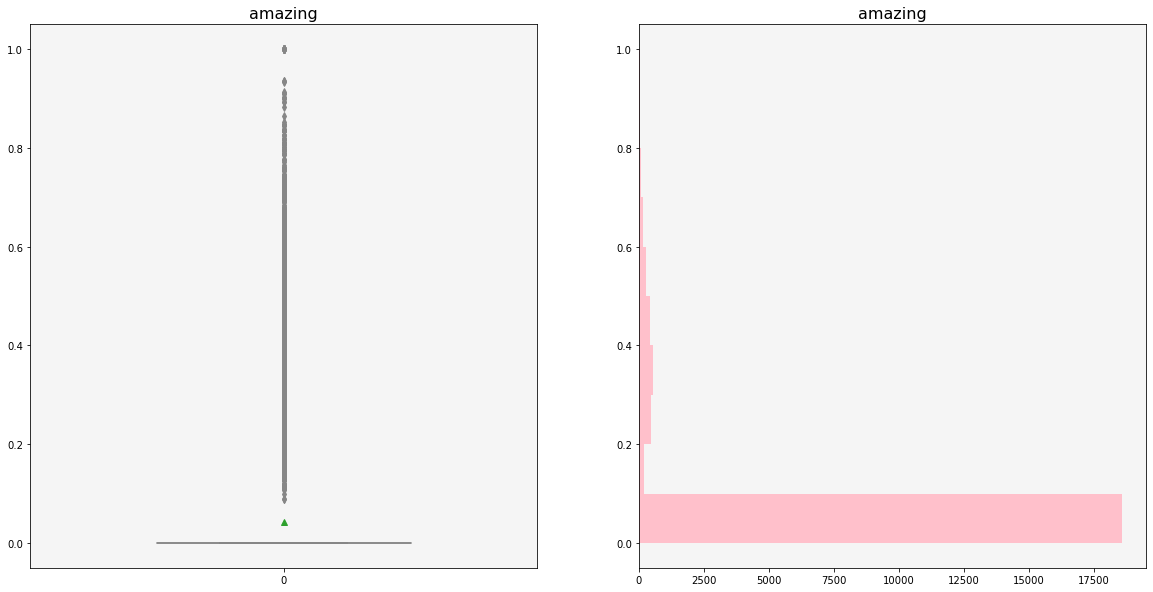

In [41]:
box_plot(reviews_vectorized, vector_cols[0])

The median for 'amazing' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [42]:
reviews_vectorized[vector_cols[1]].describe()

count    20789.000000
mean         0.029883
std          0.111109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: area, dtype: float64

In [43]:
reviews_vectorized[vector_cols[1]].skew()

4.08934632047955

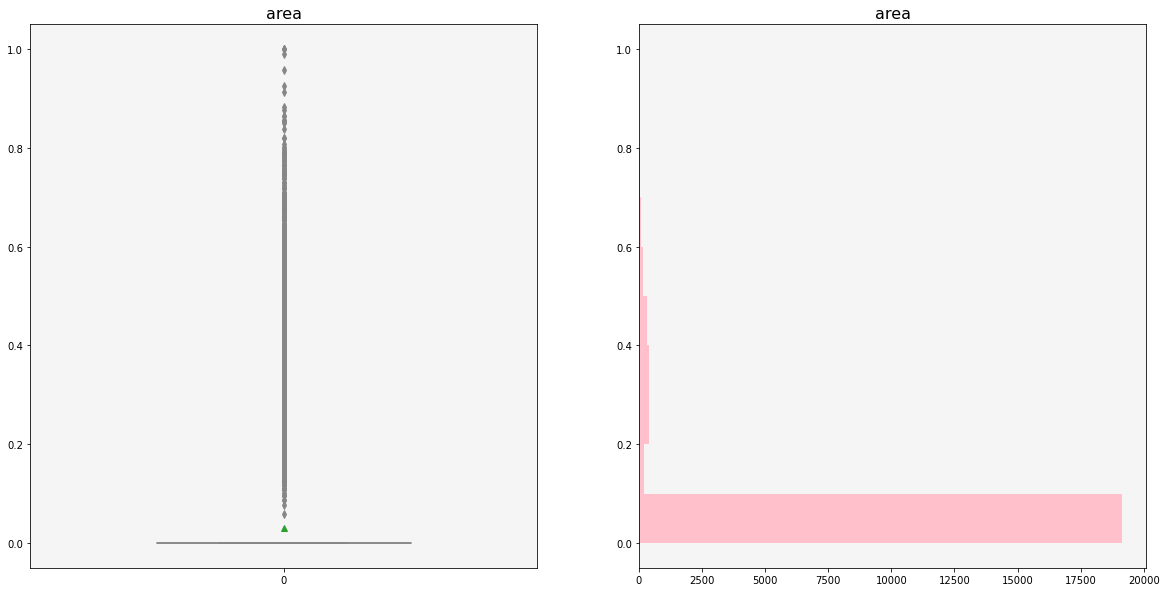

In [44]:
box_plot(reviews_vectorized, vector_cols[1])

The median for 'area' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [45]:
reviews_vectorized[vector_cols[2]].describe()

count    20789.000000
mean         0.032126
std          0.122926
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: bar, dtype: float64

In [46]:
reviews_vectorized[vector_cols[2]].skew()

4.229639886319445

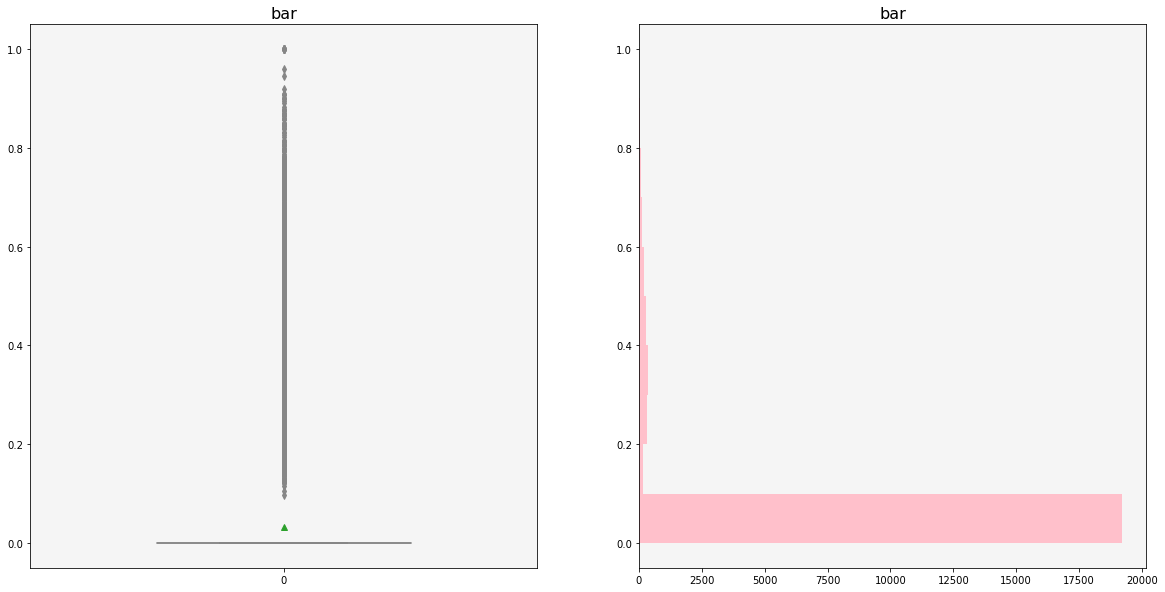

In [47]:
box_plot(reviews_vectorized, vector_cols[2])

The median for 'bar' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [48]:
reviews_vectorized[vector_cols[3]].describe()

count    20789.000000
mean         0.054312
std          0.146026
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: best, dtype: float64

In [49]:
reviews_vectorized[vector_cols[3]].skew()

2.968409895905177

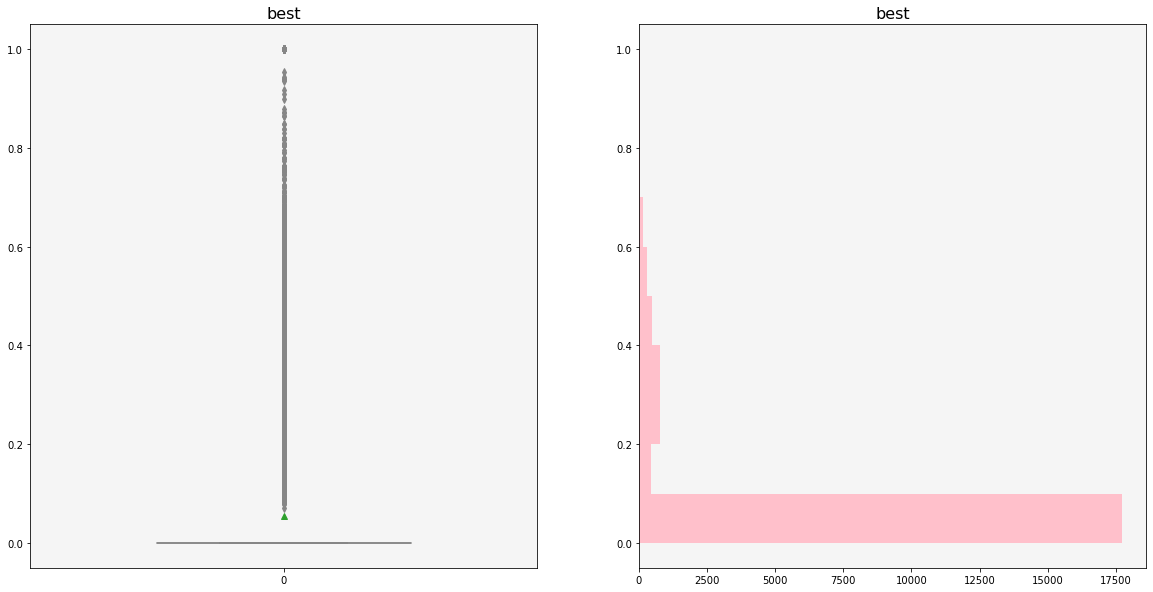

In [50]:
box_plot(reviews_vectorized, vector_cols[3])

The median for 'best' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [51]:
reviews_vectorized[vector_cols[4]].describe()

count    20789.000000
mean         0.038529
std          0.116316
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: came, dtype: float64

In [52]:
reviews_vectorized[vector_cols[4]].skew()

3.2938888540541127

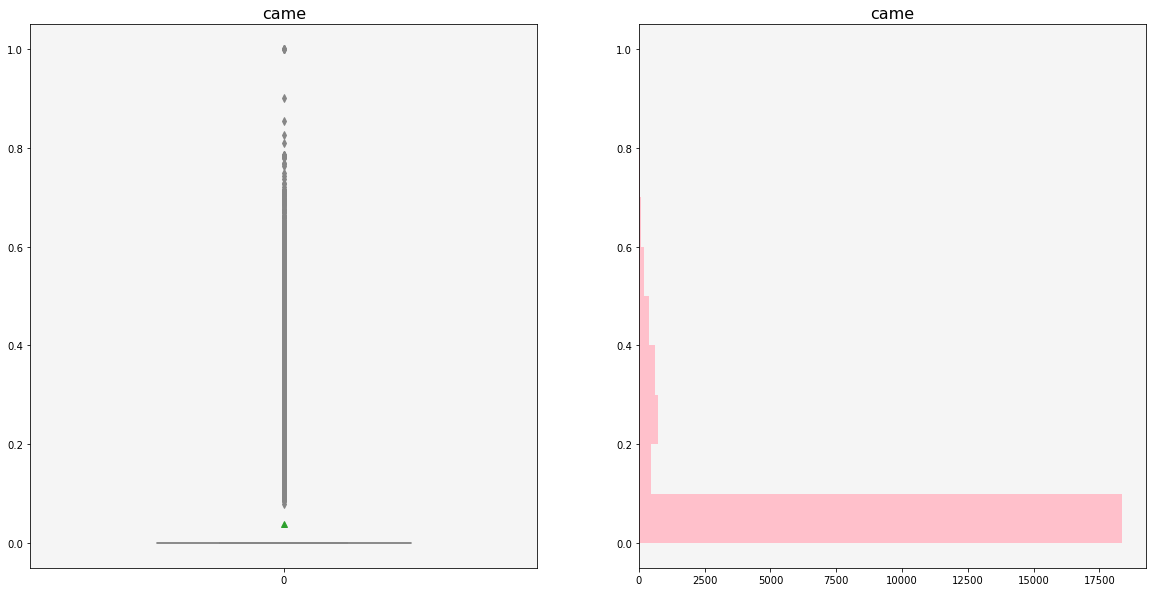

In [53]:
box_plot(reviews_vectorized, vector_cols[4])

The median for 'came' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [54]:
reviews_vectorized[vector_cols[5]].describe()

count    20789.000000
mean         0.039164
std          0.136523
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: chicken, dtype: float64

In [55]:
reviews_vectorized[vector_cols[5]].skew()

3.8144354837679164

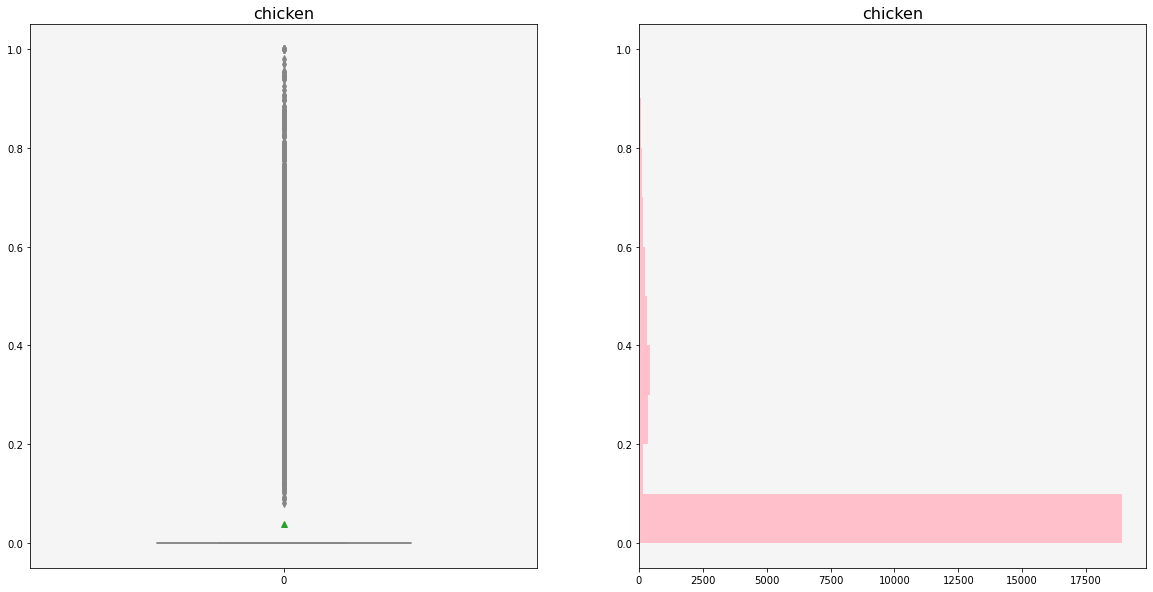

In [56]:
box_plot(reviews_vectorized, vector_cols[5])

The median for 'chicken' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [57]:
reviews_vectorized[vector_cols[6]].describe()

count    20789.000000
mean         0.035852
std          0.117464
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: come, dtype: float64

In [58]:
reviews_vectorized[vector_cols[6]].skew()

3.6883211306391543

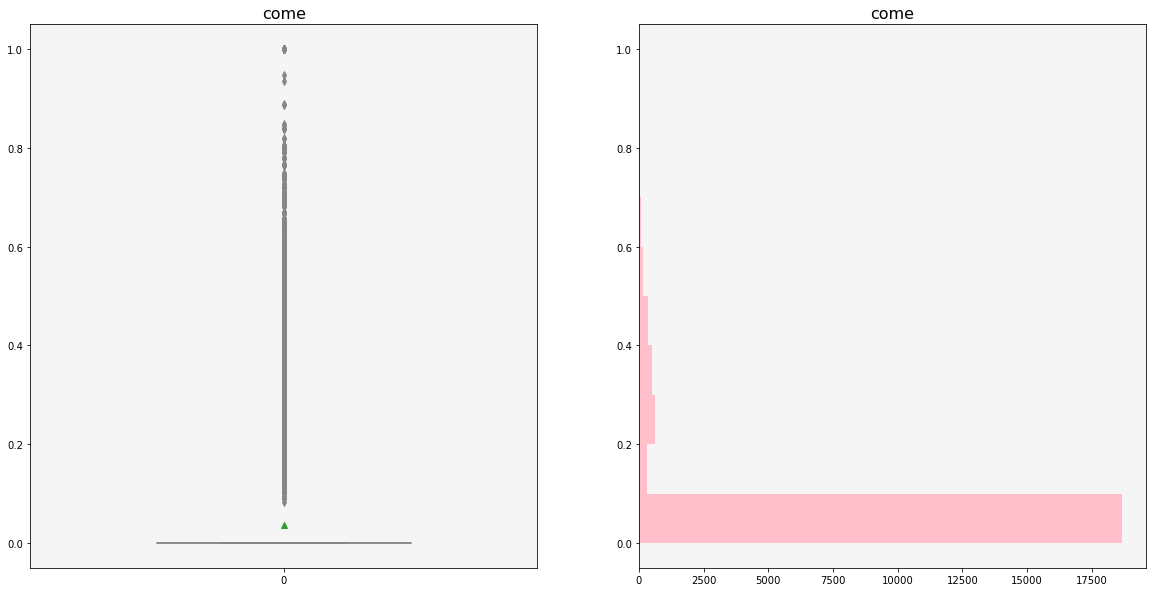

In [59]:
box_plot(reviews_vectorized, vector_cols[6])

The median for 'come' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [60]:
reviews_vectorized[vector_cols[7]].describe()

count    20789.000000
mean         0.033341
std          0.118451
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: day, dtype: float64

In [61]:
reviews_vectorized[vector_cols[7]].skew()

3.9694528762255428

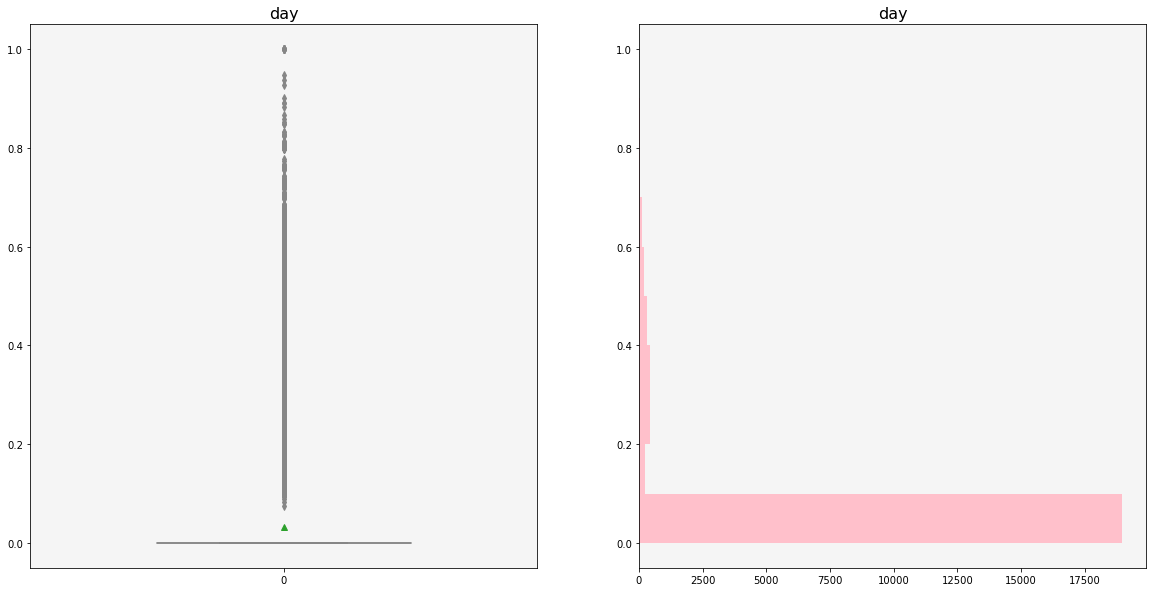

In [62]:
box_plot(reviews_vectorized, vector_cols[7])

The median for 'day' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [63]:
reviews_vectorized[vector_cols[8]].describe()

count    20789.000000
mean         0.042789
std          0.126074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: definitely, dtype: float64

In [64]:
reviews_vectorized[vector_cols[8]].skew()

3.1847537304348985

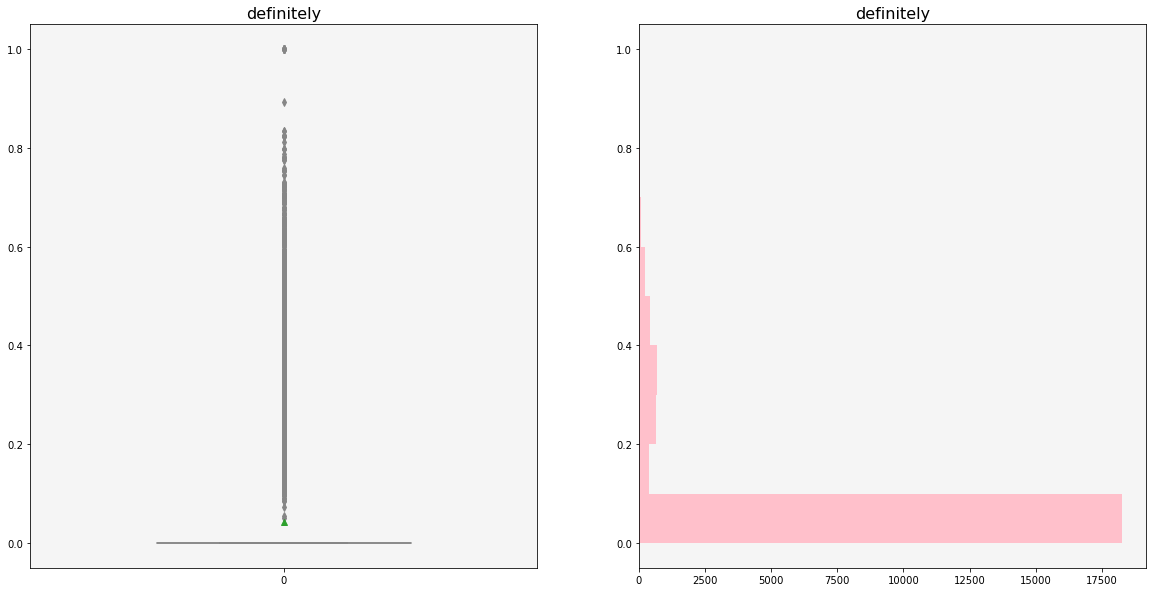

In [65]:
box_plot(reviews_vectorized, vector_cols[8])

The median for 'definitely' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [66]:
reviews_vectorized[vector_cols[9]].describe()

count    20789.000000
mean         0.044545
std          0.130702
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: delicious, dtype: float64

In [67]:
reviews_vectorized[vector_cols[9]].skew()

3.153232116954352

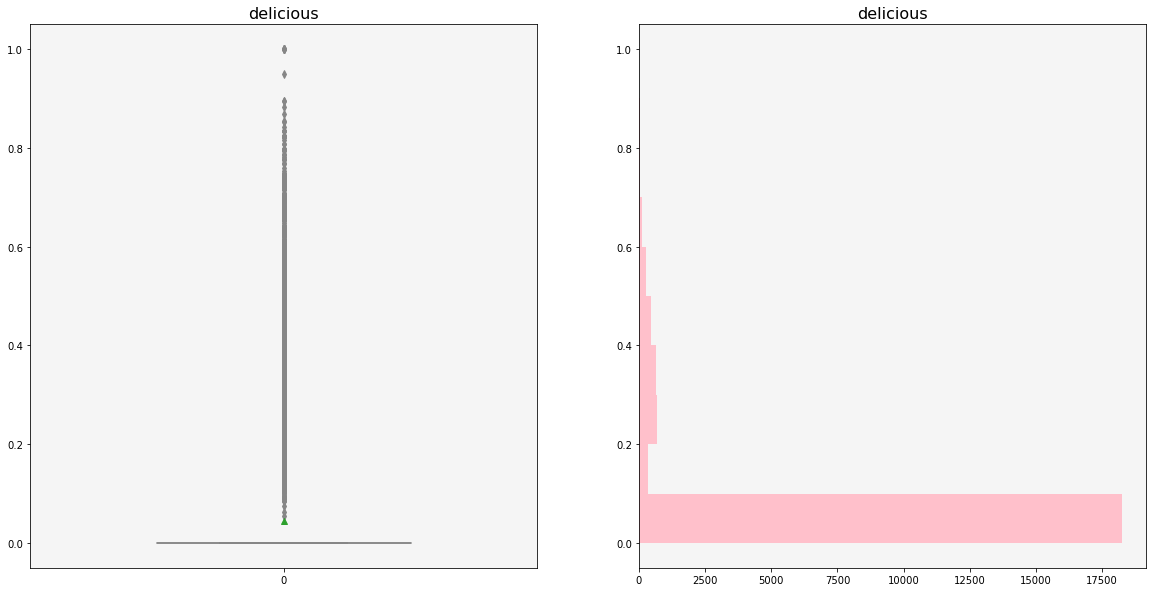

In [68]:
box_plot(reviews_vectorized, vector_cols[9])

The median for 'delicious' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [69]:
reviews_vectorized[vector_cols[10]].describe()

count    20789.000000
mean         0.041389
std          0.128543
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: did, dtype: float64

In [70]:
reviews_vectorized[vector_cols[10]].skew()

3.4924167305540603

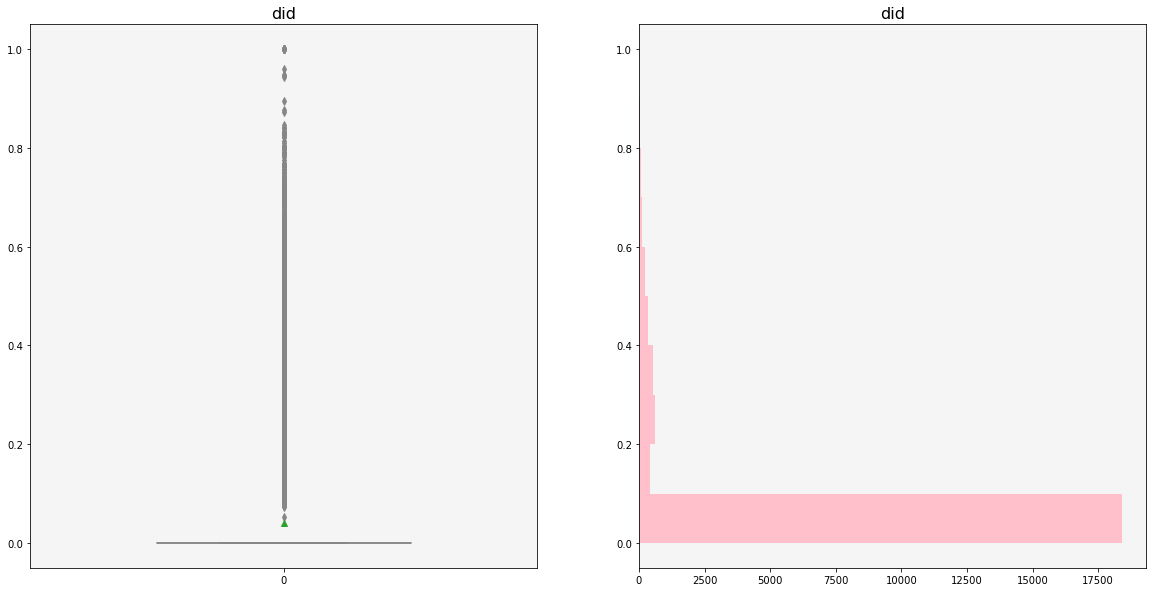

In [71]:
box_plot(reviews_vectorized, vector_cols[10])

The median for 'did' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [72]:
reviews_vectorized[vector_cols[11]].describe()

count    20789.000000
mean         0.037366
std          0.116675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: didnt, dtype: float64

In [73]:
reviews_vectorized[vector_cols[11]].skew()

3.467866396923055

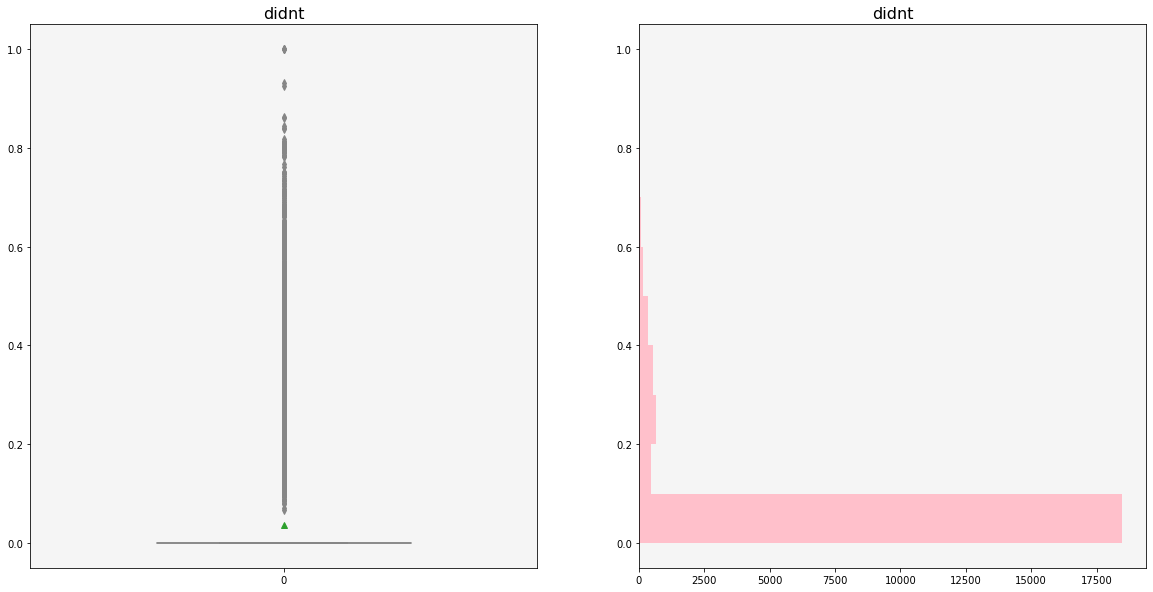

In [74]:
box_plot(reviews_vectorized, vector_cols[11])

The median for "didn't" is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [75]:
reviews_vectorized[vector_cols[12]].describe()

count    20789.000000
mean         0.045840
std          0.129728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dont, dtype: float64

In [76]:
reviews_vectorized[vector_cols[12]].skew()

3.179973017928886

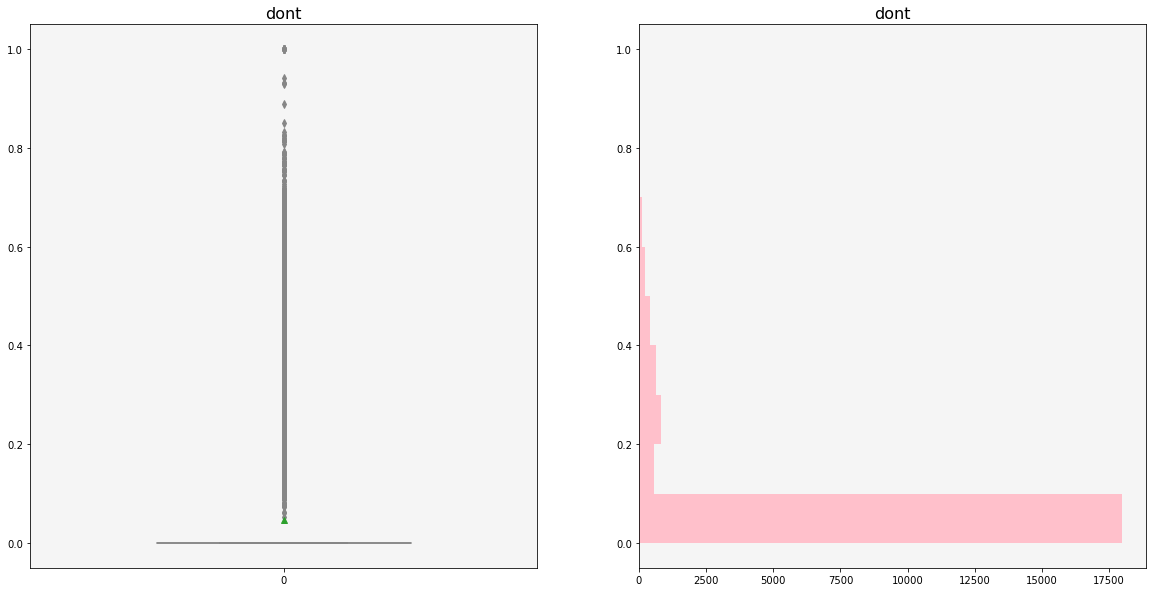

In [77]:
box_plot(reviews_vectorized, vector_cols[12])

The median for "don't" is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [78]:
reviews_vectorized[vector_cols[13]].describe()

count    20789.000000
mean         0.035164
std          0.118291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: experience, dtype: float64

In [79]:
reviews_vectorized[vector_cols[13]].skew()

3.7564771985412544

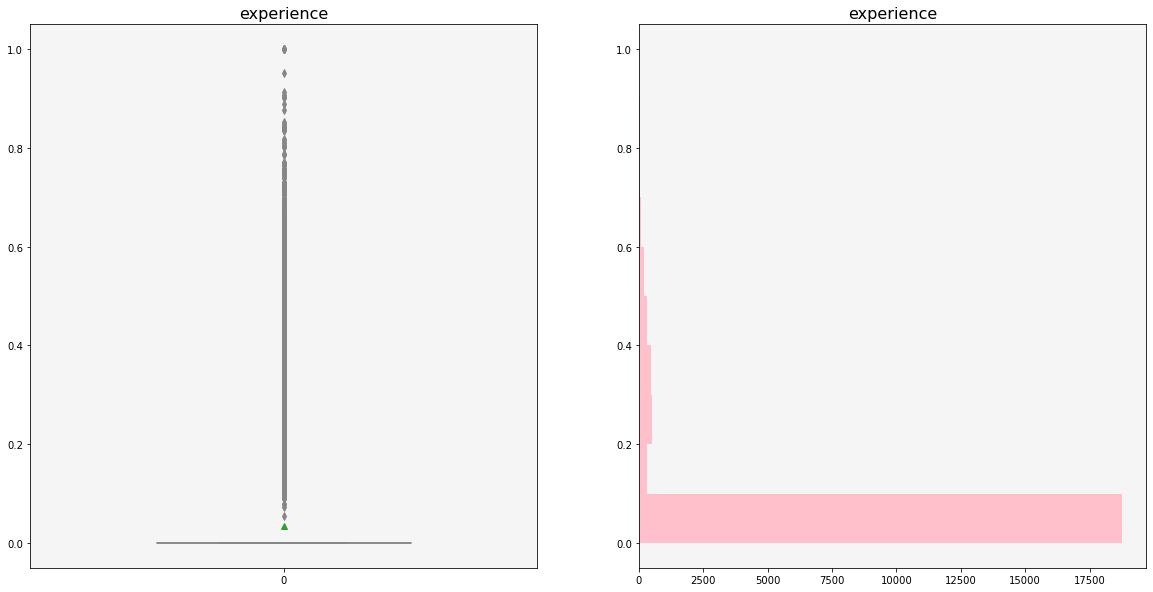

In [80]:
box_plot(reviews_vectorized, vector_cols[13])

The median for 'experience' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [81]:
reviews_vectorized[vector_cols[14]].describe()

count    20789.000000
mean         0.108555
std          0.173722
min          0.000000
25%          0.000000
50%          0.000000
75%          0.210080
max          1.000000
Name: food, dtype: float64

In [82]:
reviews_vectorized[vector_cols[14]].skew()

1.6527505744137219

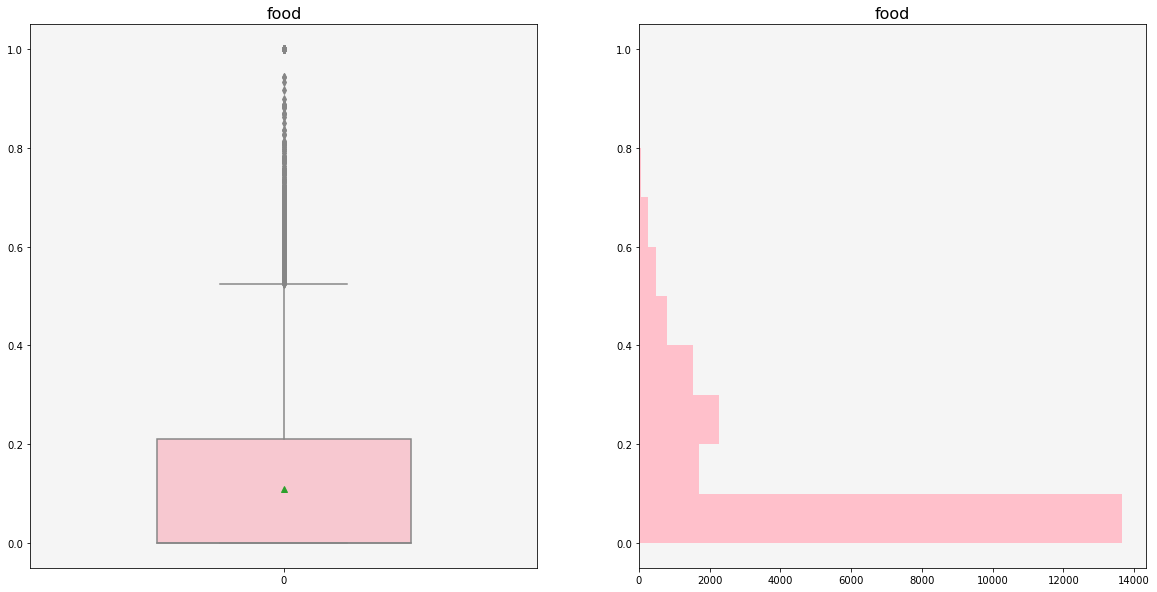

In [83]:
box_plot(reviews_vectorized, vector_cols[14])

The median for 'food' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is small, with a large number of outliers. 

In [84]:
reviews_vectorized[vector_cols[15]].describe()

count    20789.000000
mean         0.031536
std          0.116733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fresh, dtype: float64

In [85]:
reviews_vectorized[vector_cols[15]].skew()

4.032131357550636

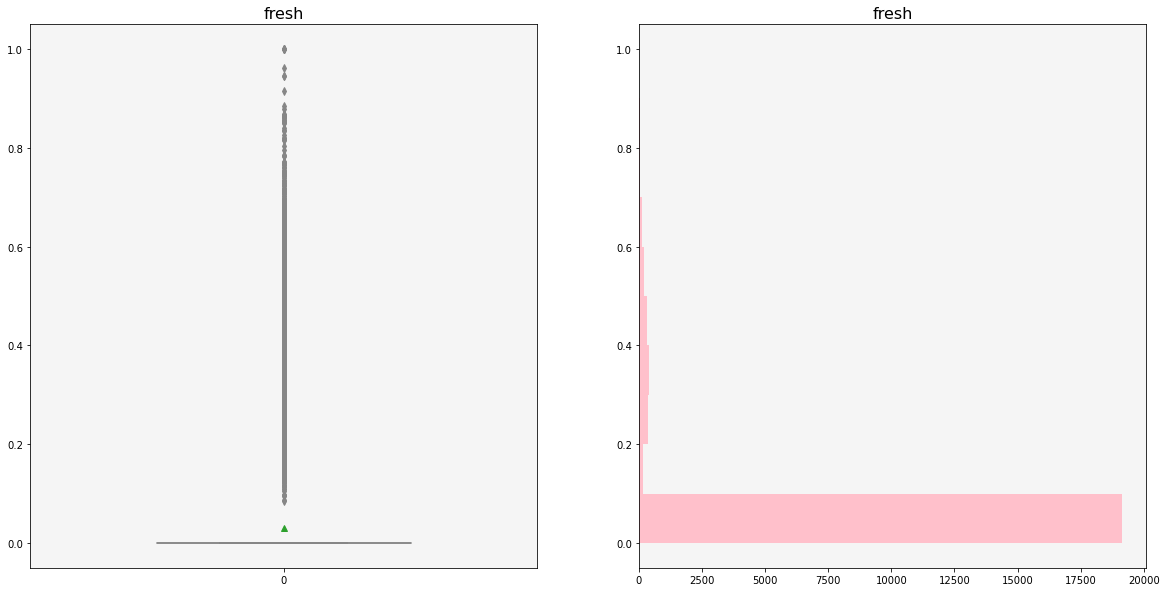

In [86]:
box_plot(reviews_vectorized, vector_cols[15])

The median for 'fresh' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [87]:
reviews_vectorized[vector_cols[16]].describe()

count    20789.000000
mean         0.047880
std          0.132159
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: friendly, dtype: float64

In [88]:
reviews_vectorized[vector_cols[16]].skew()

3.00959555271693

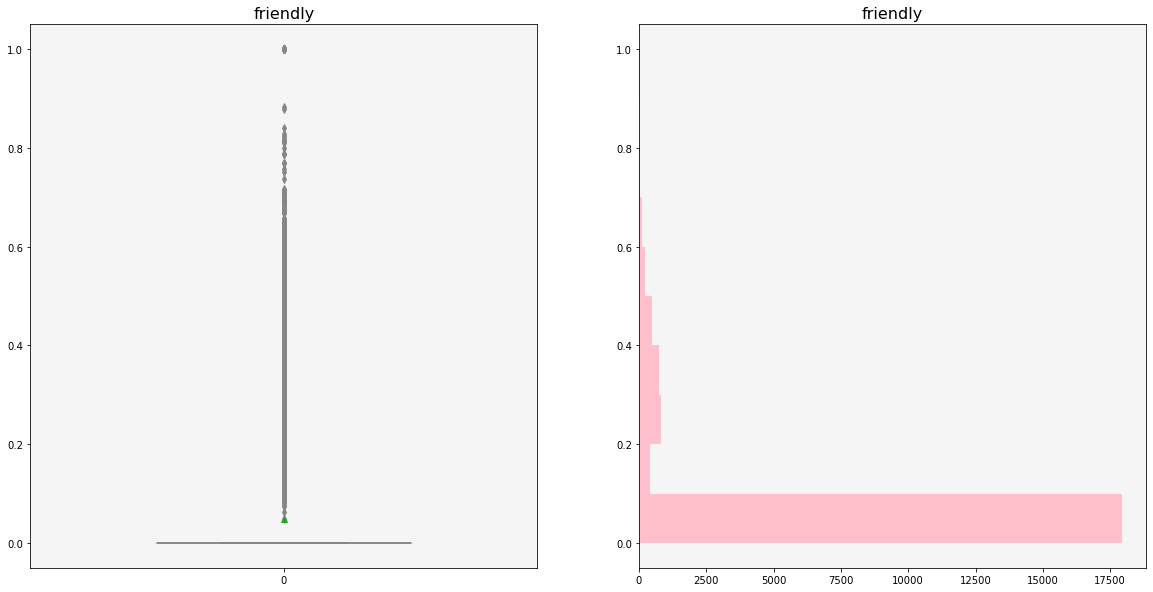

In [89]:
box_plot(reviews_vectorized, vector_cols[16])

The median for 'friendly' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [90]:
reviews_vectorized[vector_cols[17]].describe()

count    20789.000000
mean         0.033227
std          0.113040
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: going, dtype: float64

In [91]:
reviews_vectorized[vector_cols[17]].skew()

3.8505639361027115

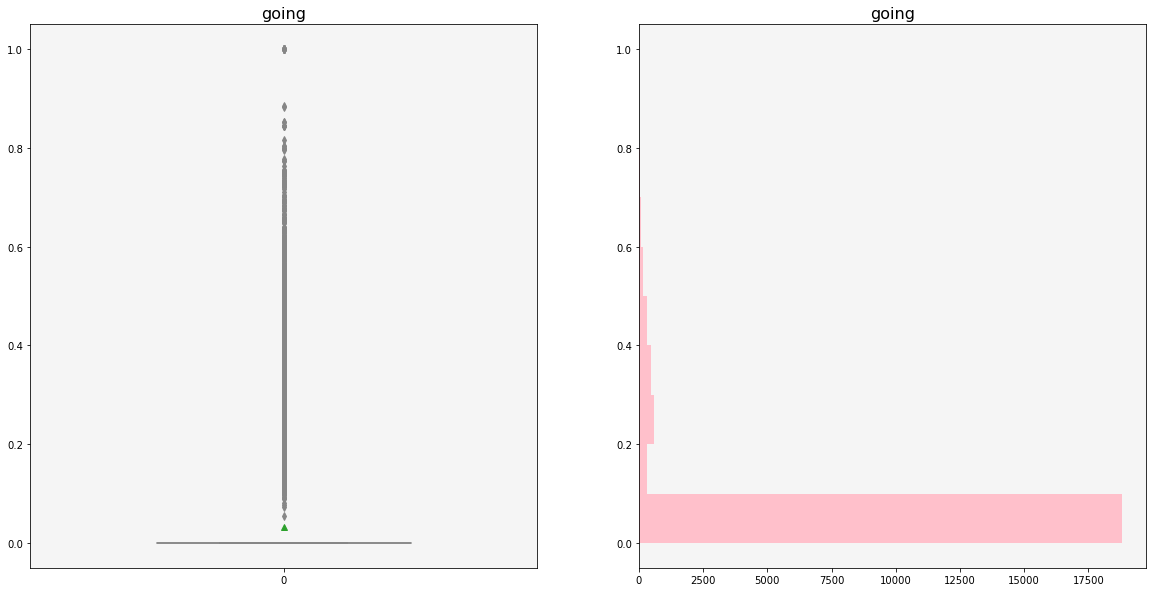

In [92]:
box_plot(reviews_vectorized, vector_cols[17])

The median for 'going' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [93]:
reviews_vectorized[vector_cols[18]].describe()

count    20789.000000
mean         0.100509
std          0.174433
min          0.000000
25%          0.000000
50%          0.000000
75%          0.183002
max          1.000000
Name: good, dtype: float64

In [94]:
reviews_vectorized[vector_cols[18]].skew()

1.8894714804179418

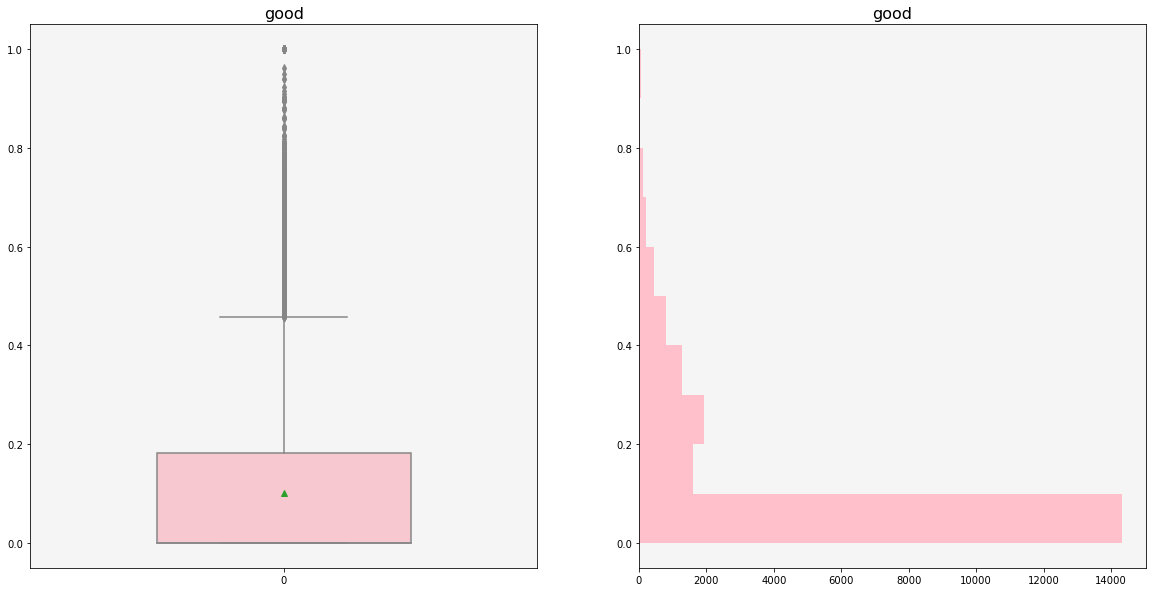

In [95]:
box_plot(reviews_vectorized, vector_cols[18])

The median for 'good' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is small, with a large number of outliers. 

In [96]:
reviews_vectorized[vector_cols[19]].describe()

count    20789.000000
mean         0.049086
std          0.134618
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: got, dtype: float64

In [97]:
reviews_vectorized[vector_cols[19]].skew()

3.02886432327704

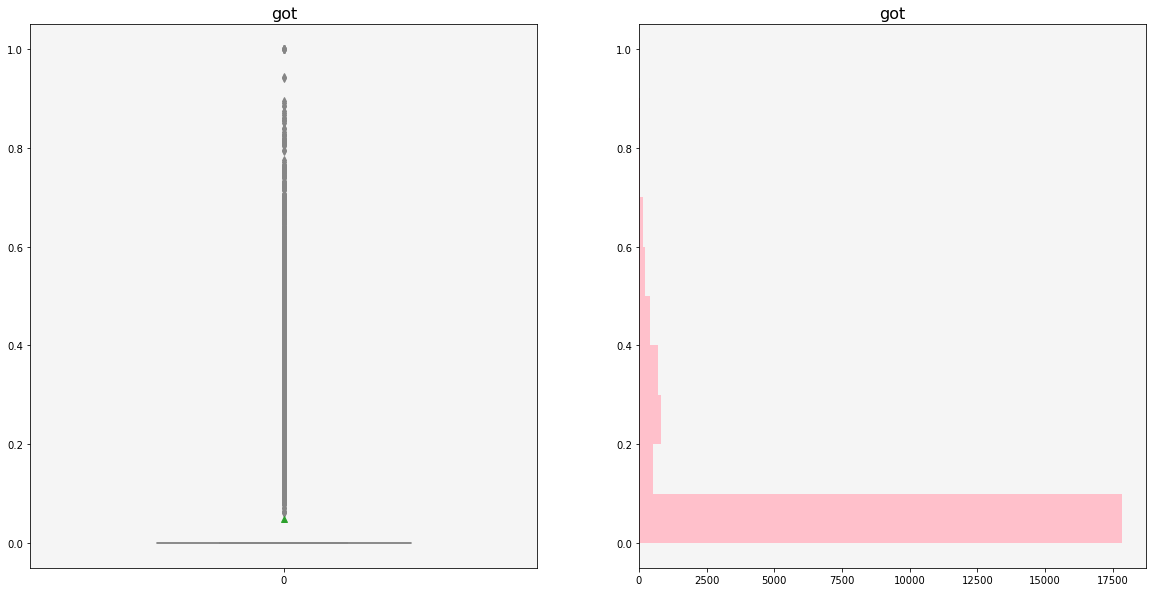

In [98]:
box_plot(reviews_vectorized, vector_cols[19])

The median for 'got' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [99]:
reviews_vectorized[vector_cols[20]].describe()

count    20789.000000
mean         0.108027
std          0.187341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.194544
max          1.000000
Name: great, dtype: float64

In [100]:
reviews_vectorized[vector_cols[20]].skew()

1.8853768972976443

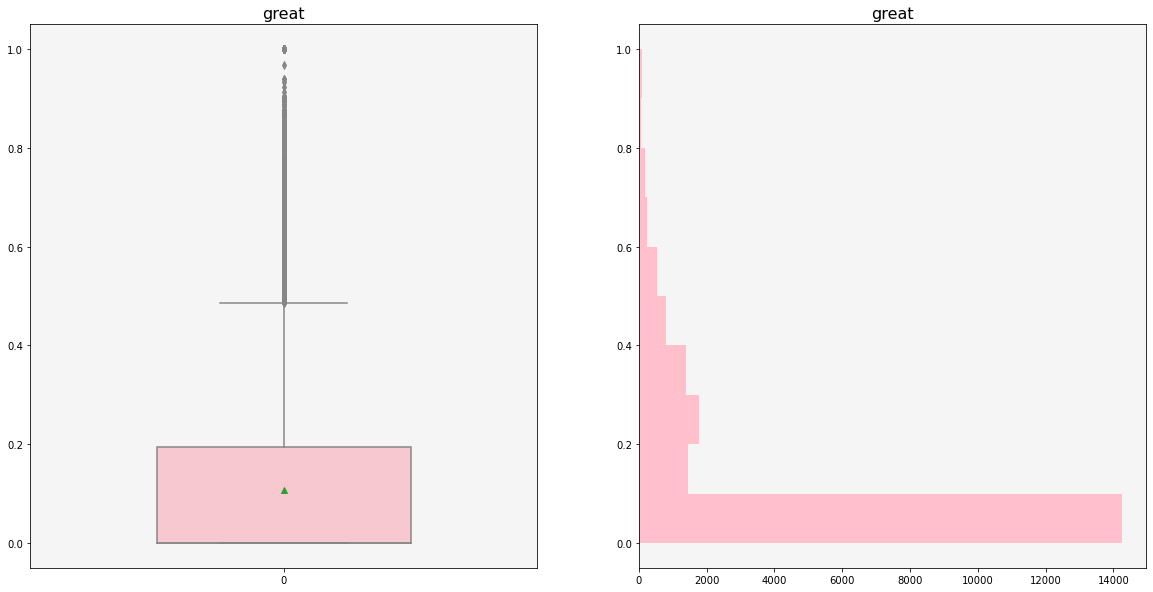

In [101]:
box_plot(reviews_vectorized, vector_cols[20])

The median for 'great' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is small, with a large number of outliers. 

In [102]:
reviews_vectorized[vector_cols[21]].describe()

count    20789.000000
mean         0.040996
std          0.124937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: im, dtype: float64

In [103]:
reviews_vectorized[vector_cols[21]].skew()

3.42387439809317

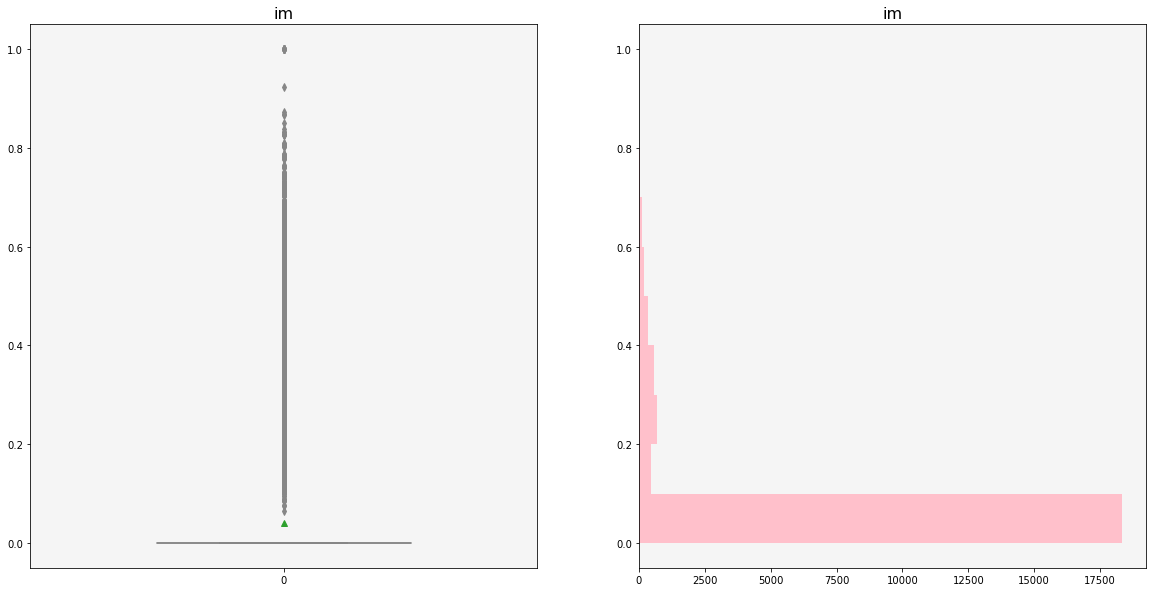

In [104]:
box_plot(reviews_vectorized, vector_cols[21])

The median for 'im' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [105]:
reviews_vectorized[vector_cols[22]].describe()

count    20789.000000
mean         0.043678
std          0.131725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ive, dtype: float64

In [106]:
reviews_vectorized[vector_cols[22]].skew()

3.302372312418537

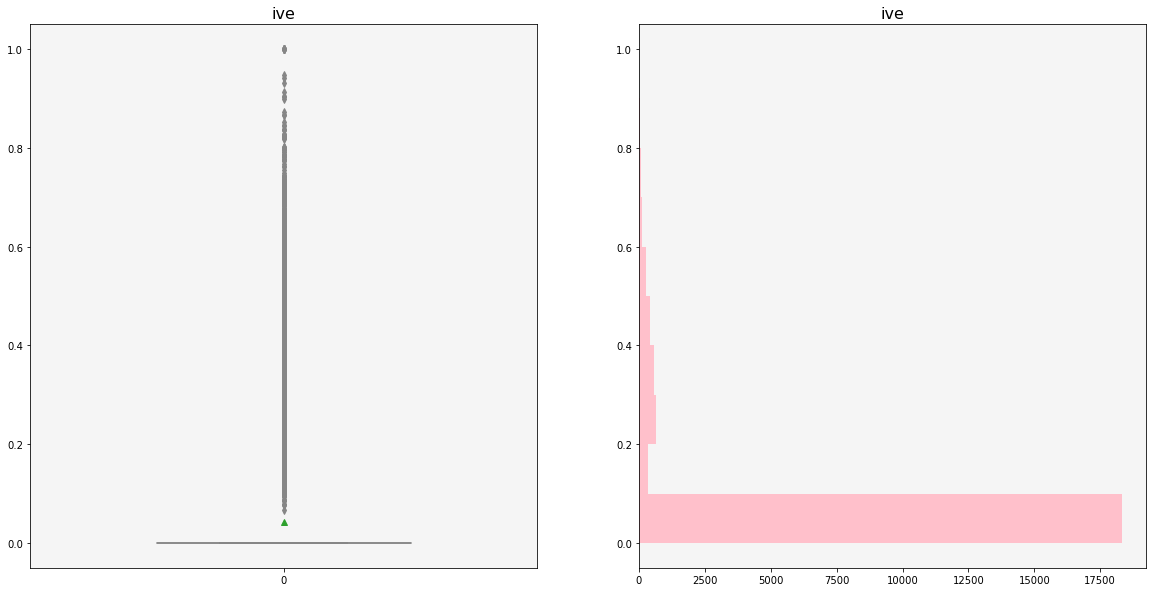

In [107]:
box_plot(reviews_vectorized, vector_cols[22])

The median for 'ive' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [108]:
reviews_vectorized[vector_cols[23]].describe()

count    20789.000000
mean         0.068201
std          0.143291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: just, dtype: float64

In [109]:
reviews_vectorized[vector_cols[23]].skew()

2.3218609620641626

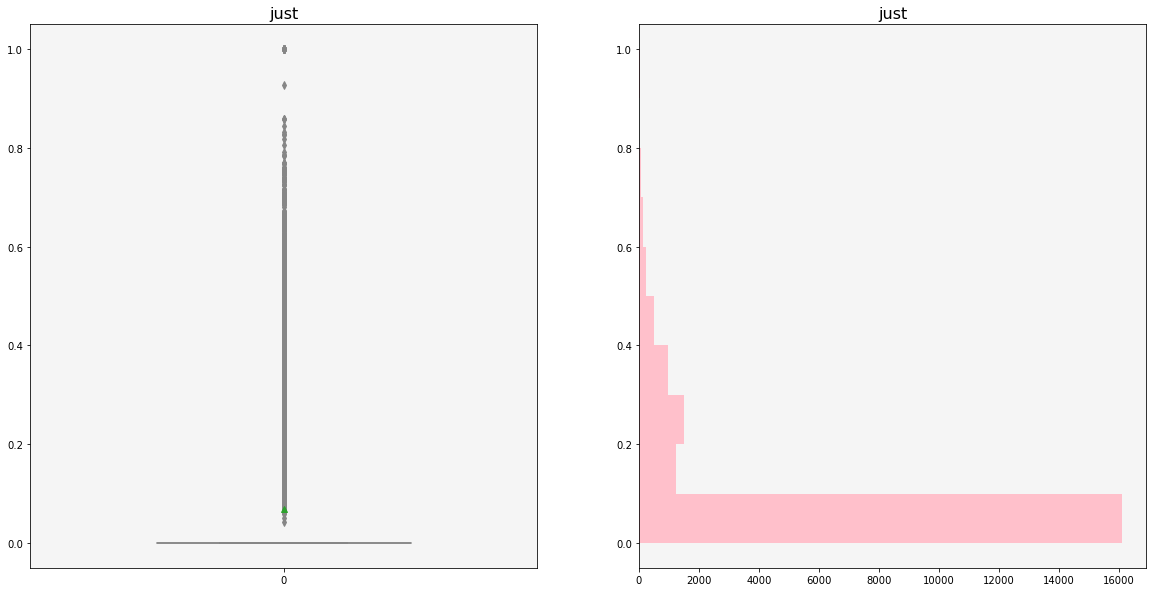

In [110]:
box_plot(reviews_vectorized, vector_cols[23])

The median for 'just' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [111]:
reviews_vectorized[vector_cols[24]].describe()

count    20789.000000
mean         0.028096
std          0.102123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: know, dtype: float64

In [112]:
reviews_vectorized[vector_cols[24]].skew()

4.079085098171642

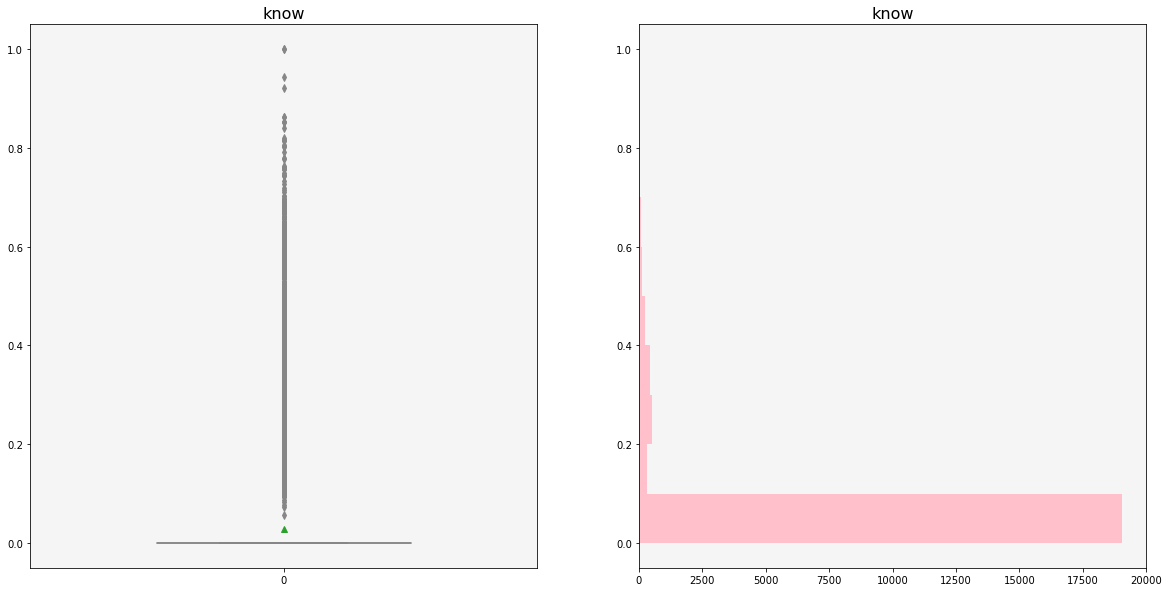

In [113]:
box_plot(reviews_vectorized, vector_cols[24])

The median for 'know' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [114]:
reviews_vectorized[vector_cols[25]].describe()

count    20789.000000
mean         0.066694
std          0.145180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: like, dtype: float64

In [115]:
reviews_vectorized[vector_cols[25]].skew()

2.4258017644827685

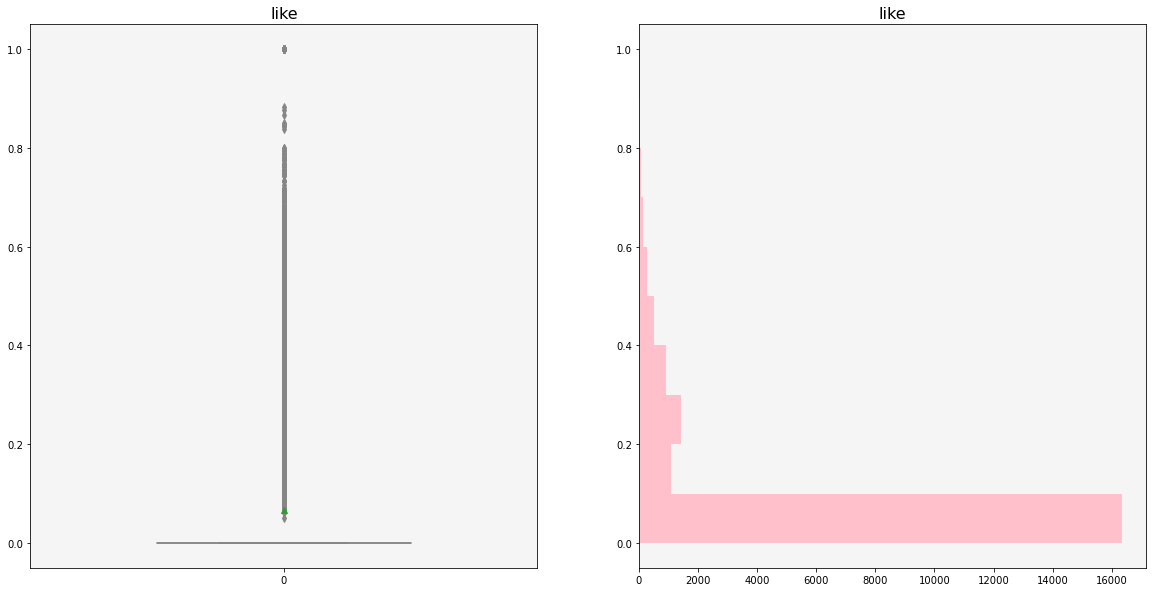

In [116]:
box_plot(reviews_vectorized, vector_cols[25])

The median for 'like' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [117]:
reviews_vectorized[vector_cols[26]].describe()

count    20789.000000
mean         0.037281
std          0.120065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: little, dtype: float64

In [118]:
reviews_vectorized[vector_cols[26]].skew()

3.5942211664223644

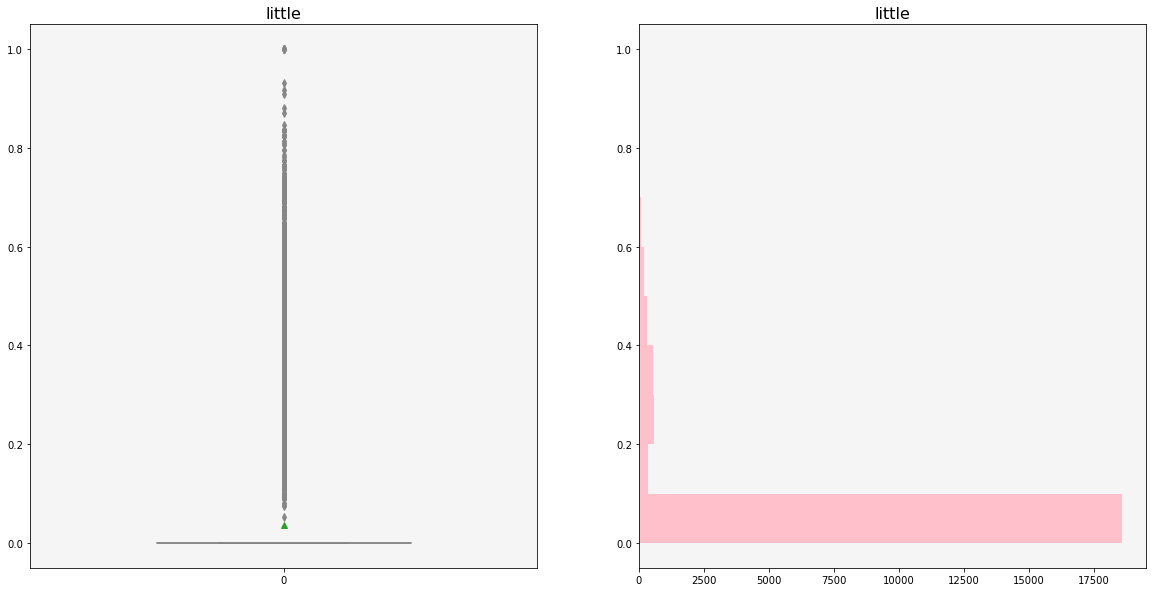

In [119]:
box_plot(reviews_vectorized, vector_cols[26])

The median for 'little' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [120]:
reviews_vectorized[vector_cols[27]].describe()

count    20789.000000
mean         0.047238
std          0.144567
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: love, dtype: float64

In [121]:
reviews_vectorized[vector_cols[27]].skew()

3.340291762148963

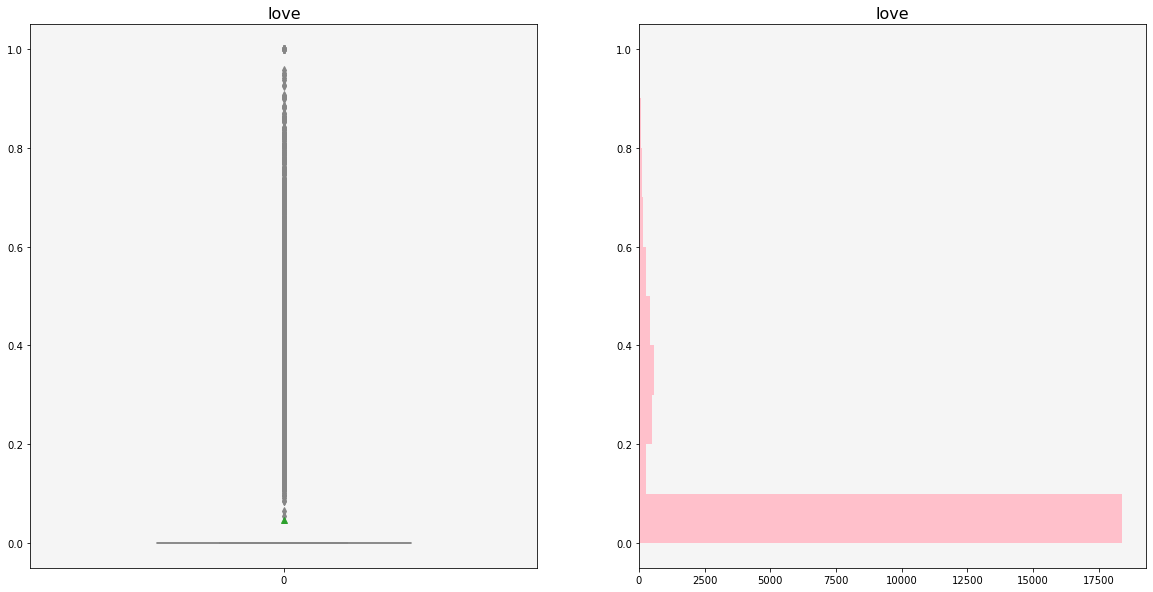

In [122]:
box_plot(reviews_vectorized, vector_cols[27])

The median for 'love' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [123]:
reviews_vectorized[vector_cols[28]].describe()

count    20789.000000
mean         0.034627
std          0.113515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: make, dtype: float64

In [124]:
reviews_vectorized[vector_cols[28]].skew()

3.639158954073286

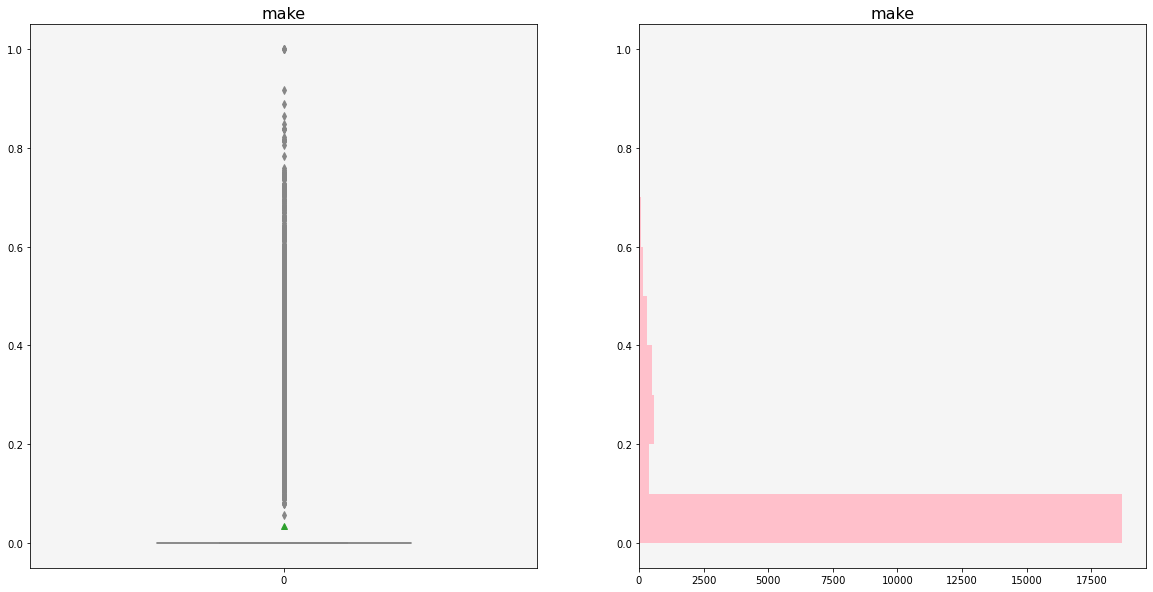

In [125]:
box_plot(reviews_vectorized, vector_cols[28])

The median for 'make' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [126]:
reviews_vectorized[vector_cols[29]].describe()

count    20789.000000
mean         0.034132
std          0.116157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: menu, dtype: float64

In [127]:
reviews_vectorized[vector_cols[29]].skew()

3.7843718070389687

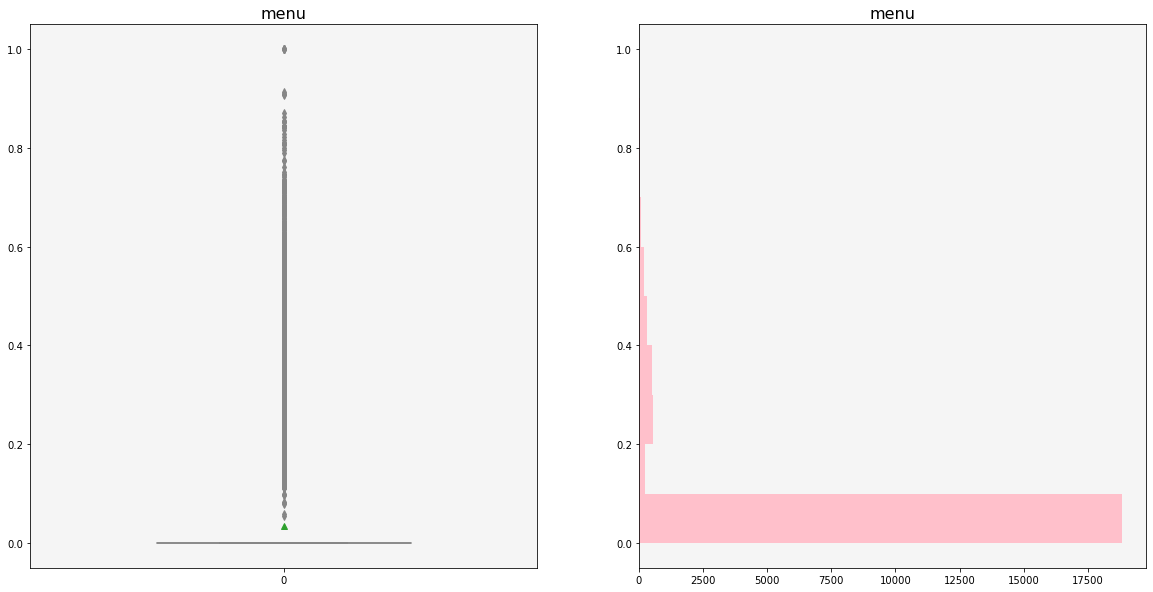

In [128]:
box_plot(reviews_vectorized, vector_cols[29])

The median for 'menu' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [129]:
reviews_vectorized[vector_cols[30]].describe()

count    20789.000000
mean         0.037169
std          0.124370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: new, dtype: float64

In [130]:
reviews_vectorized[vector_cols[30]].skew()

3.708876274027503

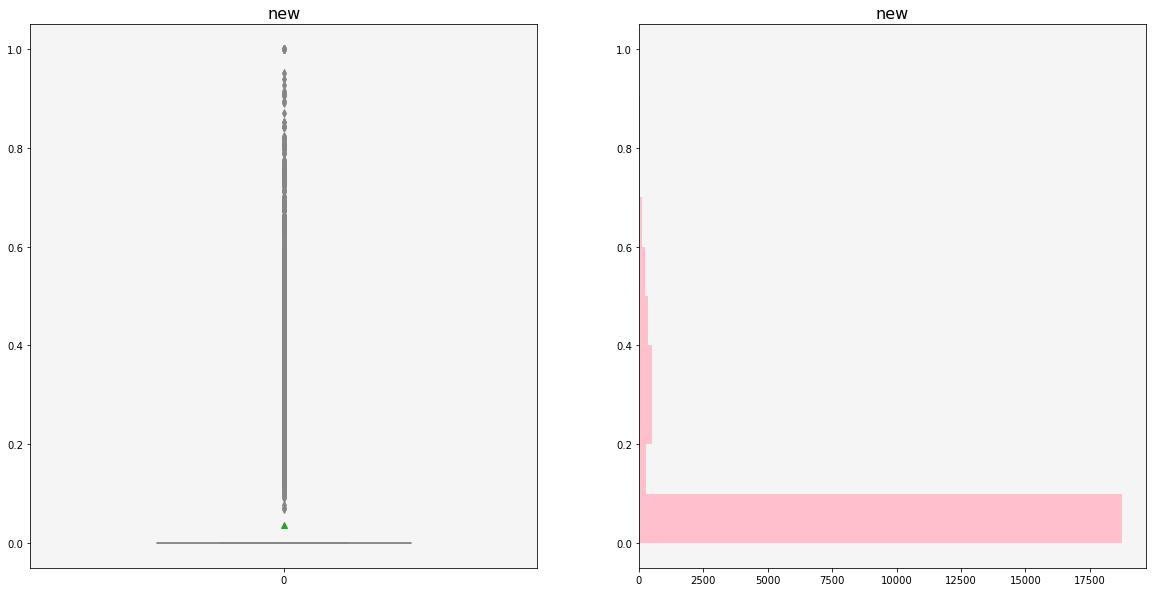

In [131]:
box_plot(reviews_vectorized, vector_cols[30])

The median for 'new' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [132]:
reviews_vectorized[vector_cols[31]].describe()

count    20789.000000
mean         0.049044
std          0.135688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: nice, dtype: float64

In [133]:
reviews_vectorized[vector_cols[31]].skew()

3.0505335516757017

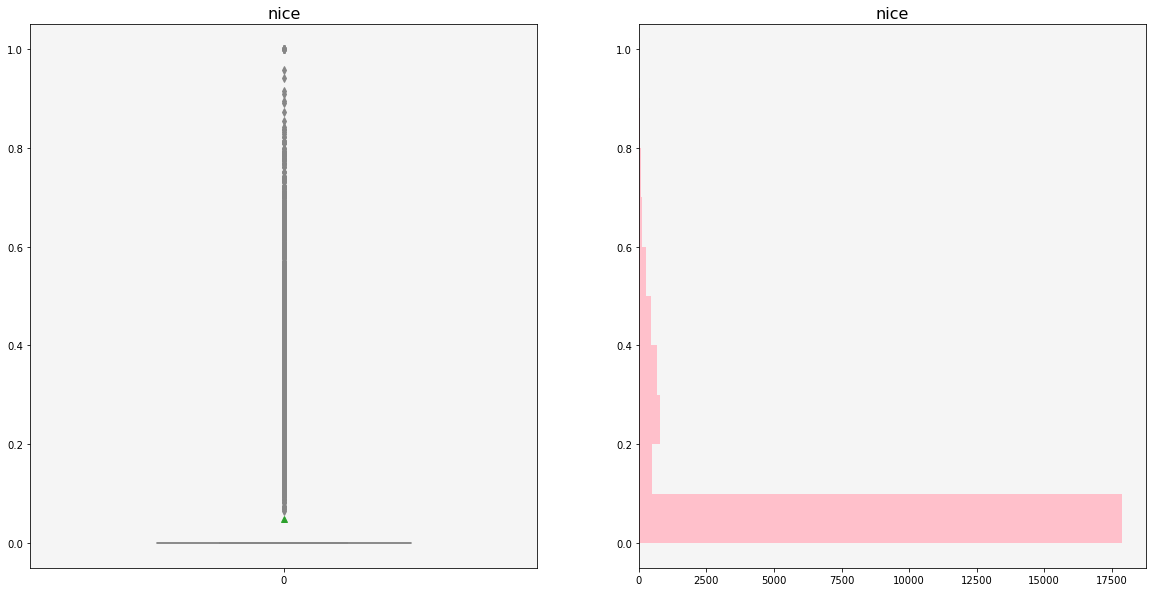

In [134]:
box_plot(reviews_vectorized, vector_cols[31])

The median for 'nice' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [135]:
reviews_vectorized[vector_cols[32]].describe()

count    20789.000000
mean         0.041549
std          0.130436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: order, dtype: float64

In [136]:
reviews_vectorized[vector_cols[32]].skew()

3.569052204831414

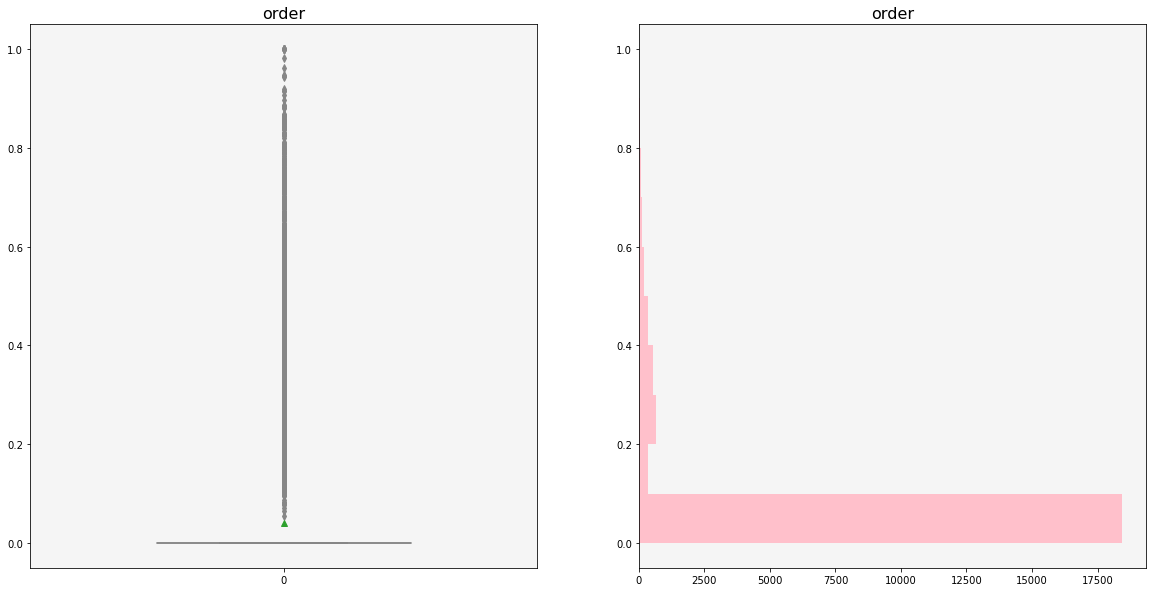

In [137]:
box_plot(reviews_vectorized, vector_cols[32])

The median for 'order' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [138]:
reviews_vectorized[vector_cols[33]].describe()

count    20789.000000
mean         0.039885
std          0.122956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ordered, dtype: float64

In [139]:
reviews_vectorized[vector_cols[33]].skew()

3.400643109811625

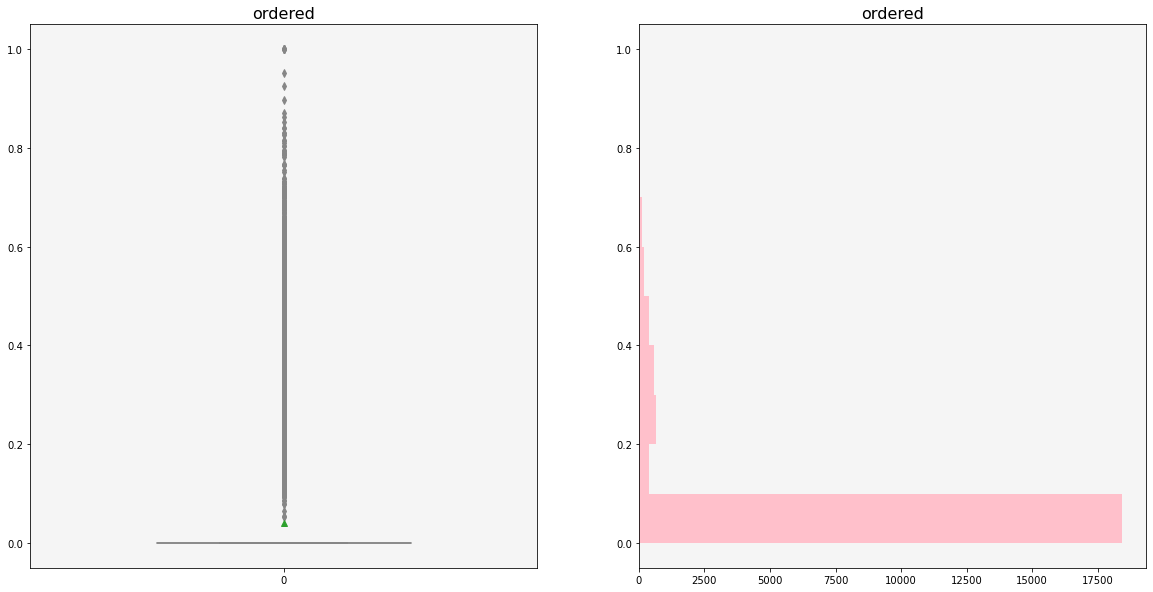

In [140]:
box_plot(reviews_vectorized, vector_cols[33])

The median for 'ordered' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [141]:
reviews_vectorized[vector_cols[34]].describe()

count    20789.000000
mean         0.033877
std          0.115806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: people, dtype: float64

In [142]:
reviews_vectorized[vector_cols[34]].skew()

3.886442516516909

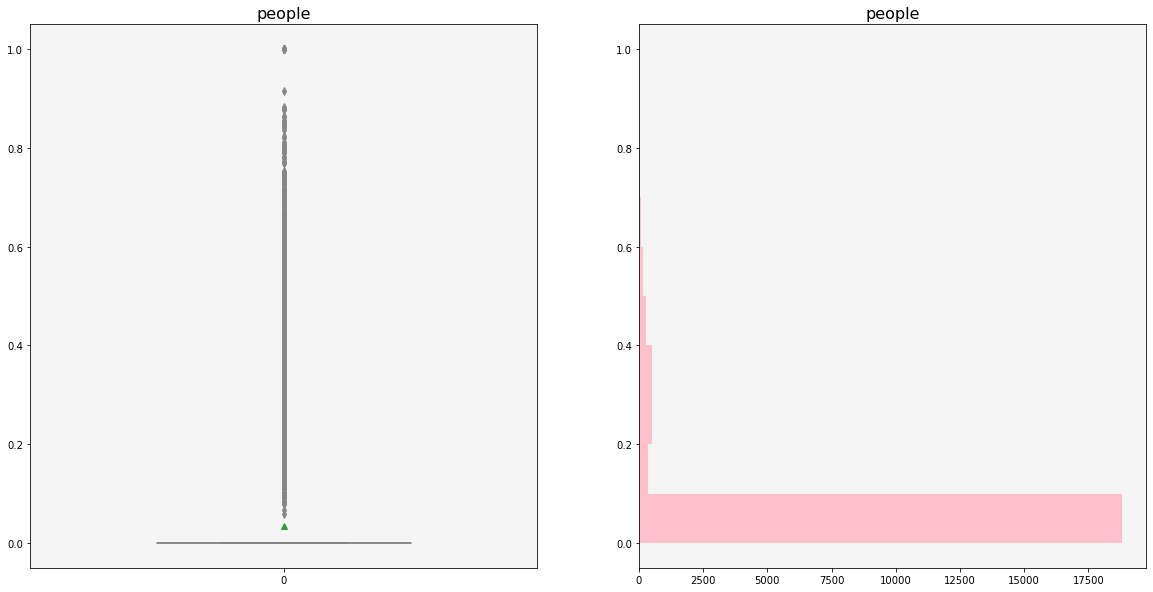

In [143]:
box_plot(reviews_vectorized, vector_cols[34])

The median for 'people' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [144]:
reviews_vectorized[vector_cols[35]].describe()

count    20789.000000
mean         0.027648
std          0.134382
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pizza, dtype: float64

In [145]:
reviews_vectorized[vector_cols[35]].skew()

5.073023390291924

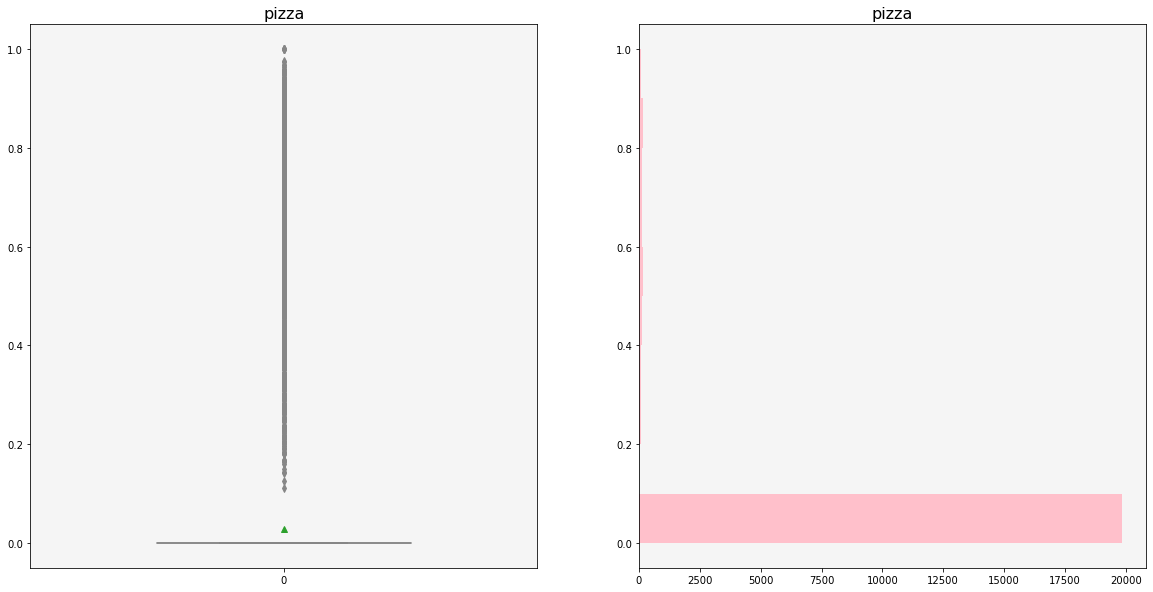

In [146]:
box_plot(reviews_vectorized, vector_cols[35])

The median for 'pizza' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [147]:
reviews_vectorized[vector_cols[36]].describe()

count    20789.000000
mean         0.096598
std          0.164248
min          0.000000
25%          0.000000
50%          0.000000
75%          0.182335
max          1.000000
Name: place, dtype: float64

In [148]:
reviews_vectorized[vector_cols[36]].skew()

1.8205003318198132

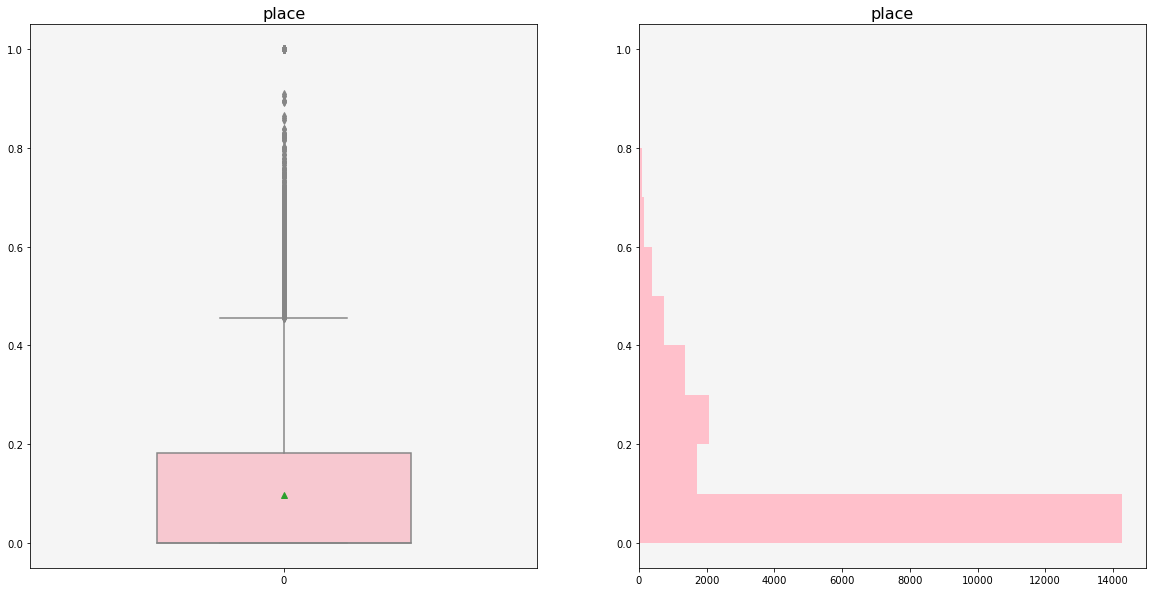

In [149]:
box_plot(reviews_vectorized, vector_cols[36])

The median for 'place' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is small, with a large number of outliers. 

In [150]:
reviews_vectorized[vector_cols[37]].describe()

count    20789.000000
mean         0.029260
std          0.108087
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pretty, dtype: float64

In [151]:
reviews_vectorized[vector_cols[37]].skew()

4.117463265773541

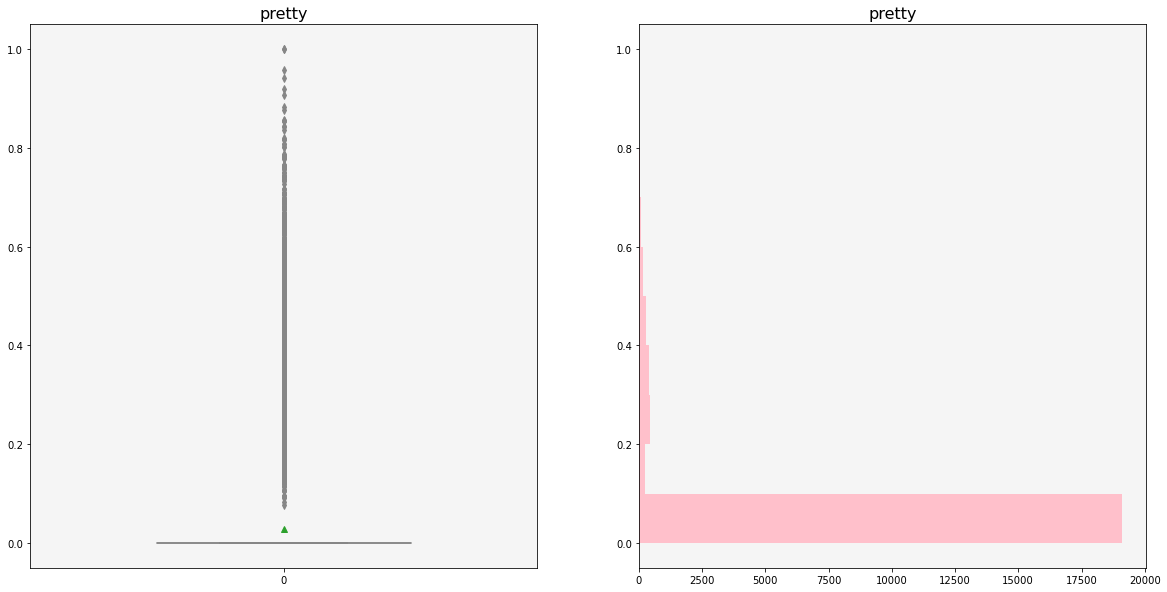

In [152]:
box_plot(reviews_vectorized, vector_cols[37])

The median for 'pretty' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [153]:
reviews_vectorized[vector_cols[38]].describe()

count    20789.000000
mean         0.055826
std          0.138945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: really, dtype: float64

In [154]:
reviews_vectorized[vector_cols[38]].skew()

2.711909134852717

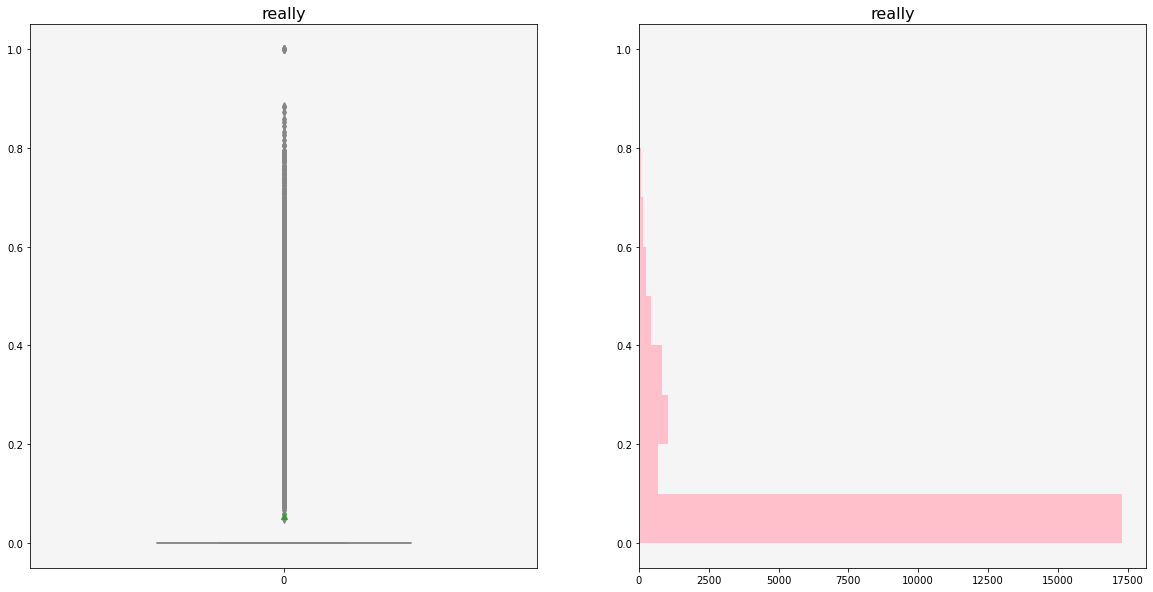

In [155]:
box_plot(reviews_vectorized, vector_cols[38])

The median for 'really' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [156]:
reviews_vectorized[vector_cols[39]].describe()

count    20789.000000
mean         0.041306
std          0.130364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: recommend, dtype: float64

In [157]:
reviews_vectorized[vector_cols[39]].skew()

3.44372733427345

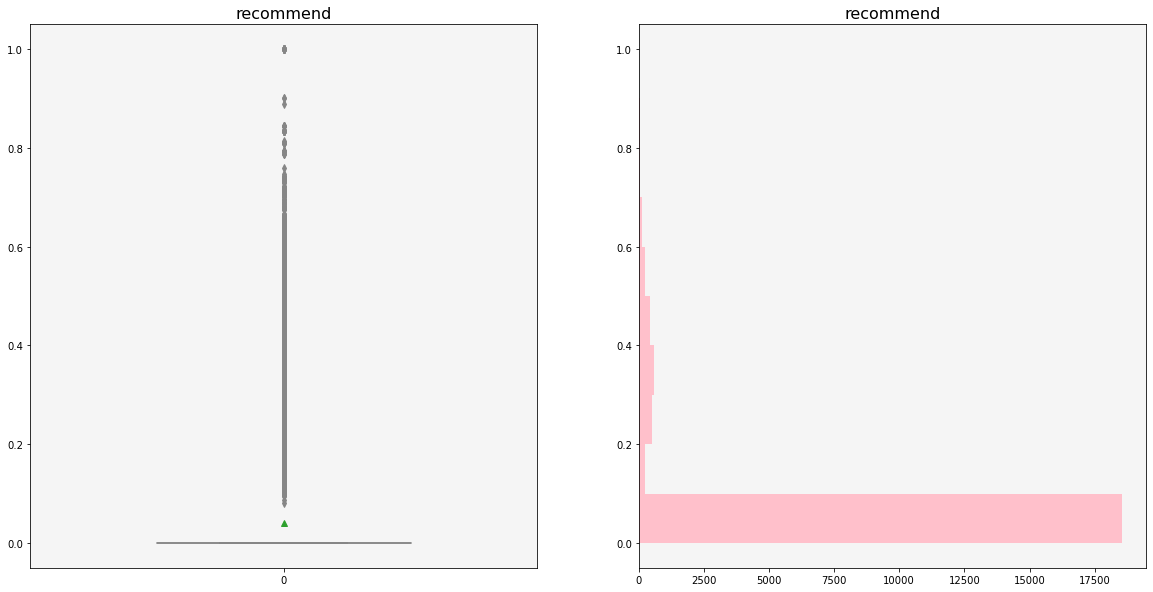

In [158]:
box_plot(reviews_vectorized, vector_cols[39])

The median for 'recommend' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [159]:
reviews_vectorized[vector_cols[40]].describe()

count    20789.000000
mean         0.038258
std          0.122763
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: restaurant, dtype: float64

In [160]:
reviews_vectorized[vector_cols[40]].skew()

3.5055884948595537

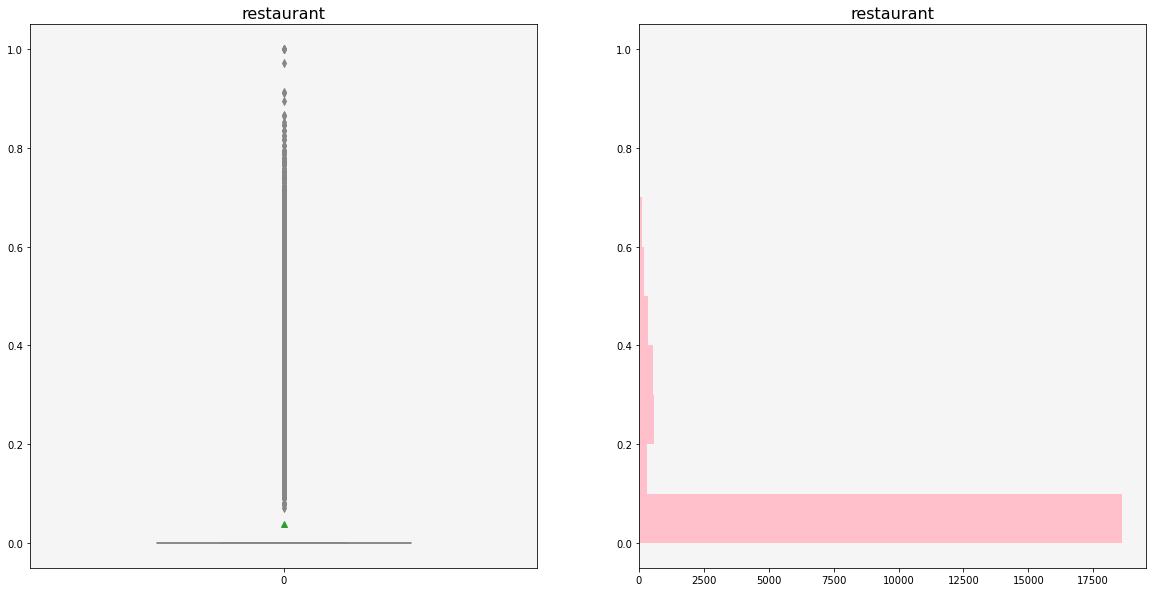

In [161]:
box_plot(reviews_vectorized, vector_cols[40])

The median for 'restaurant' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [162]:
reviews_vectorized[vector_cols[41]].describe()

count    20789.000000
mean         0.028422
std          0.104790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: right, dtype: float64

In [163]:
reviews_vectorized[vector_cols[41]].skew()

4.168894574531875

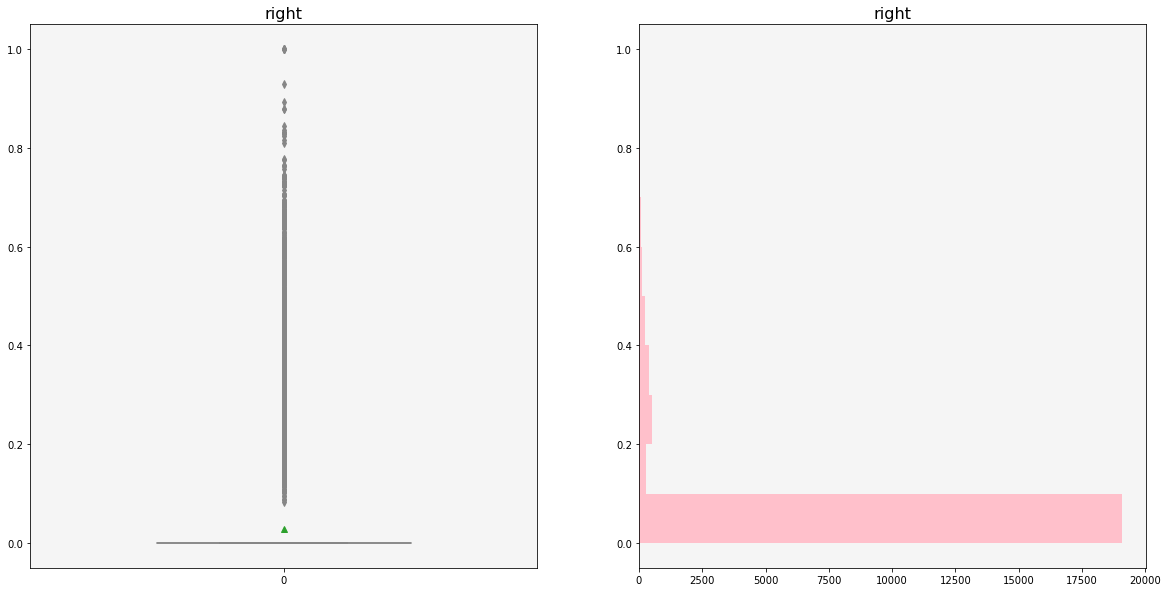

In [164]:
box_plot(reviews_vectorized, vector_cols[41])

The median for 'right' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [165]:
reviews_vectorized[vector_cols[42]].describe()

count    20789.000000
mean         0.029870
std          0.112363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: said, dtype: float64

In [166]:
reviews_vectorized[vector_cols[42]].skew()

4.256166605567571

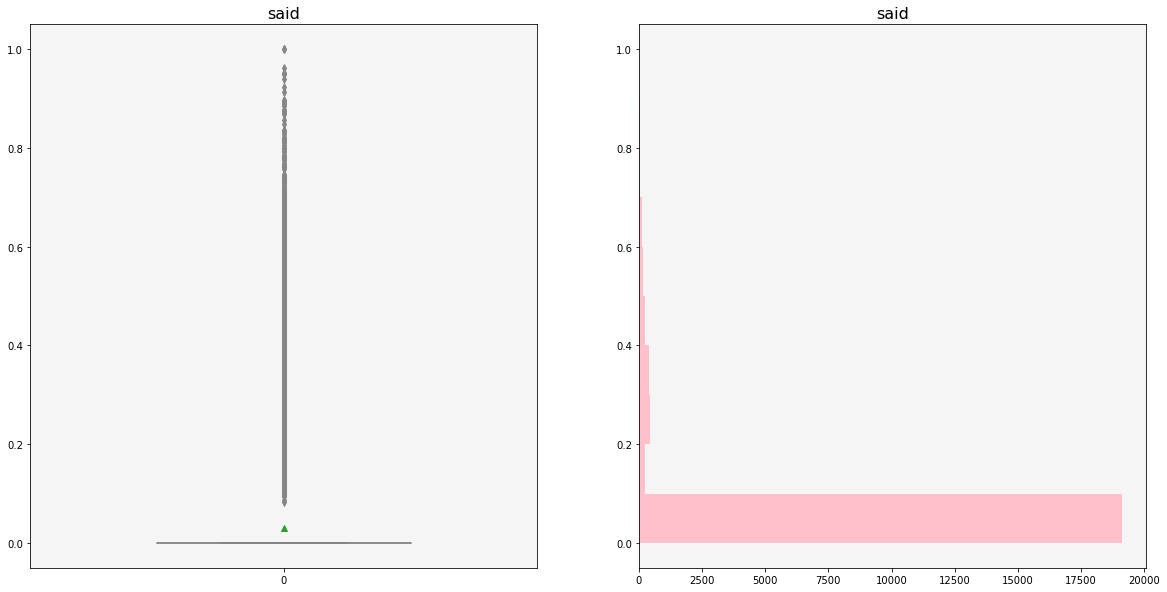

In [167]:
box_plot(reviews_vectorized, vector_cols[42])

The median for 'said' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [168]:
reviews_vectorized[vector_cols[43]].describe()

count    20789.000000
mean         0.081385
std          0.158969
min          0.000000
25%          0.000000
50%          0.000000
75%          0.117614
max          1.000000
Name: service, dtype: float64

In [169]:
reviews_vectorized[vector_cols[43]].skew()

2.179314026033231

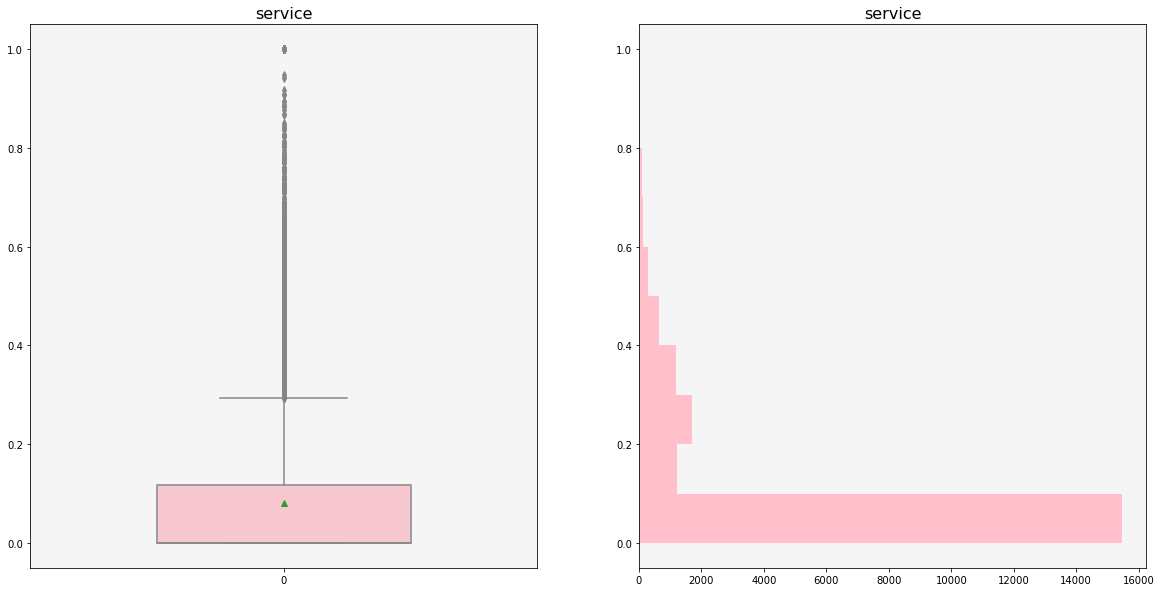

In [170]:
box_plot(reviews_vectorized, vector_cols[43])

The median for 'service' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is small, with a large number of outliers. 

In [171]:
reviews_vectorized[vector_cols[44]].describe()

count    20789.000000
mean         0.051911
std          0.140476
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: staff, dtype: float64

In [172]:
reviews_vectorized[vector_cols[44]].skew()

2.9461672398286636

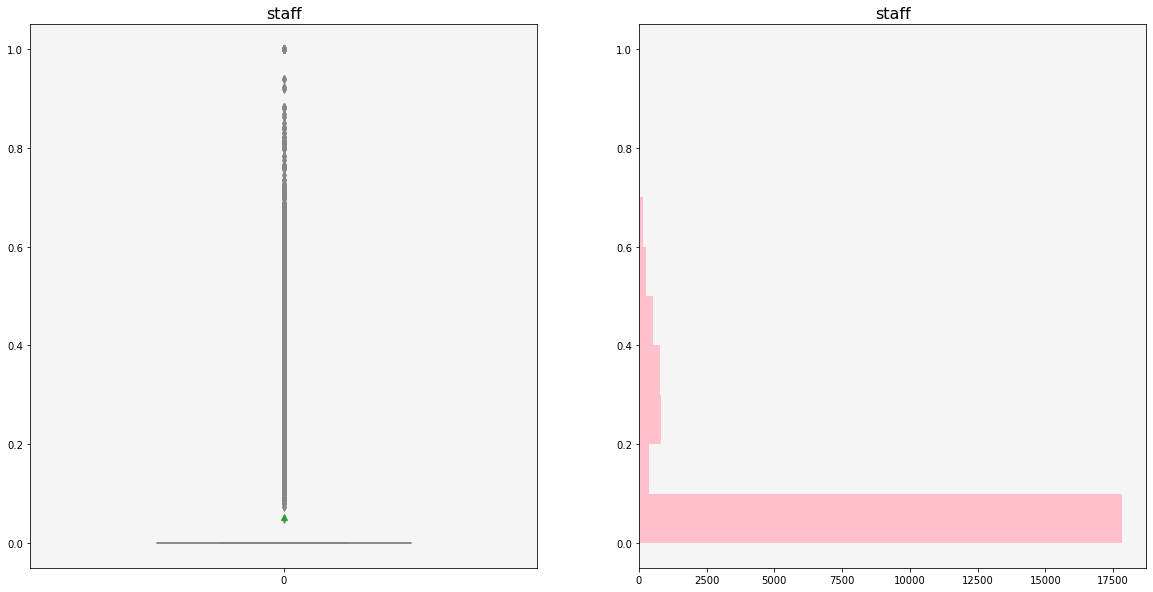

In [173]:
box_plot(reviews_vectorized, vector_cols[44])

The median for 'staff' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [174]:
reviews_vectorized[vector_cols[45]].describe()

count    20789.000000
mean         0.071264
std          0.150341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: time, dtype: float64

In [175]:
reviews_vectorized[vector_cols[45]].skew()

2.3473196332192225

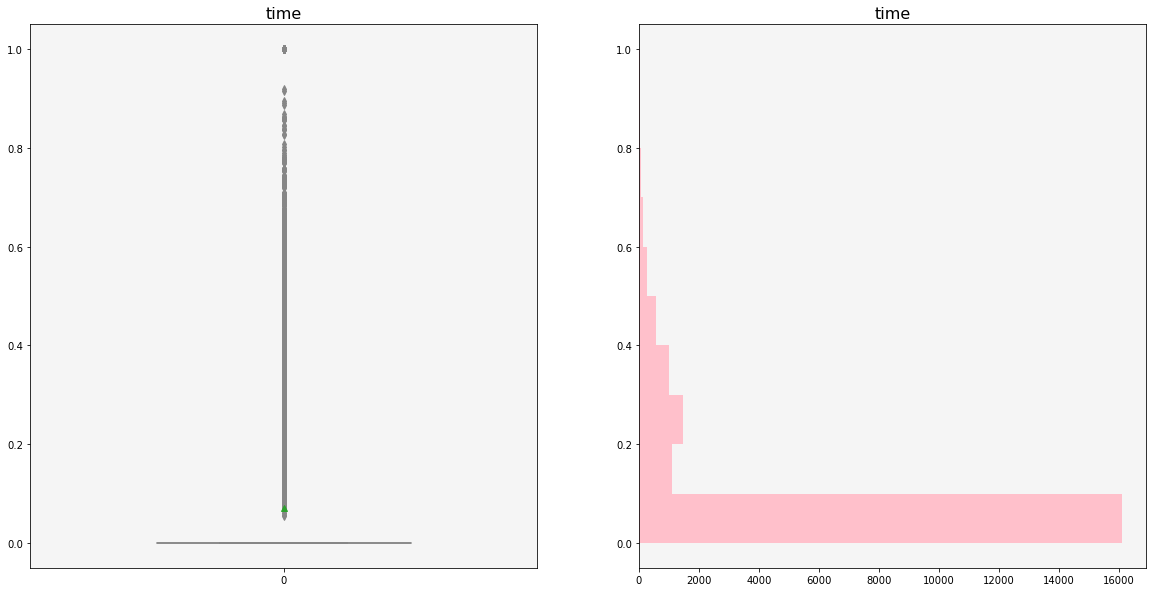

In [176]:
box_plot(reviews_vectorized, vector_cols[45])

The median for 'time' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [177]:
reviews_vectorized[vector_cols[46]].describe()

count    20789.000000
mean         0.037023
std          0.116683
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: try, dtype: float64

In [178]:
reviews_vectorized[vector_cols[46]].skew()

3.512089646594369

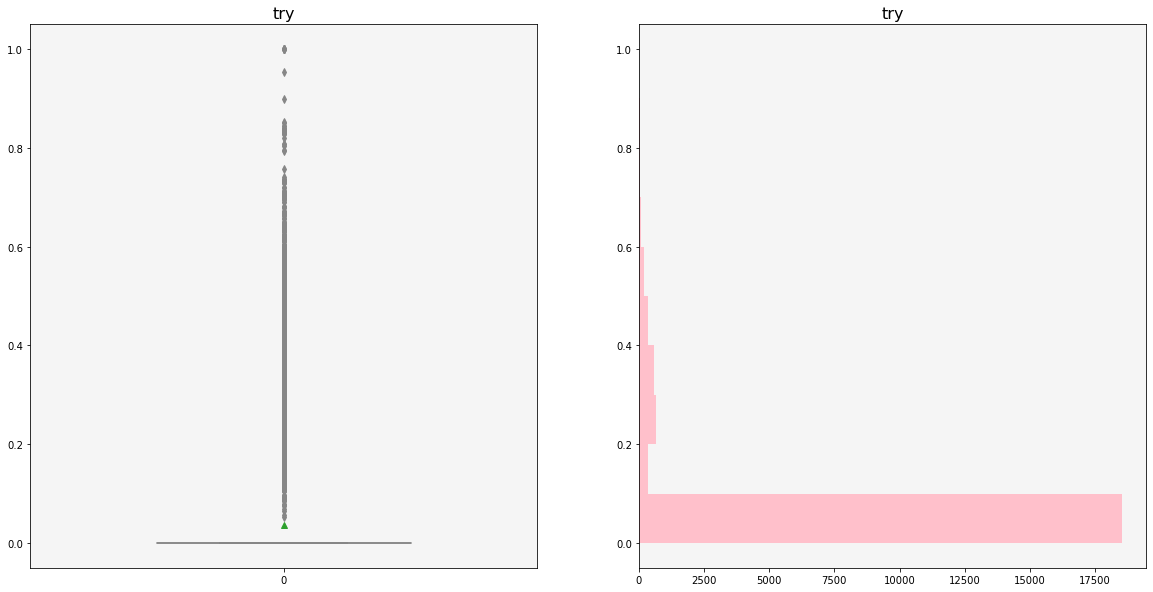

In [179]:
box_plot(reviews_vectorized, vector_cols[46])

The median for 'try' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [180]:
reviews_vectorized[vector_cols[47]].describe()

count    20789.000000
mean         0.033154
std          0.116265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: wait, dtype: float64

In [181]:
reviews_vectorized[vector_cols[47]].skew()

3.9003848738664737

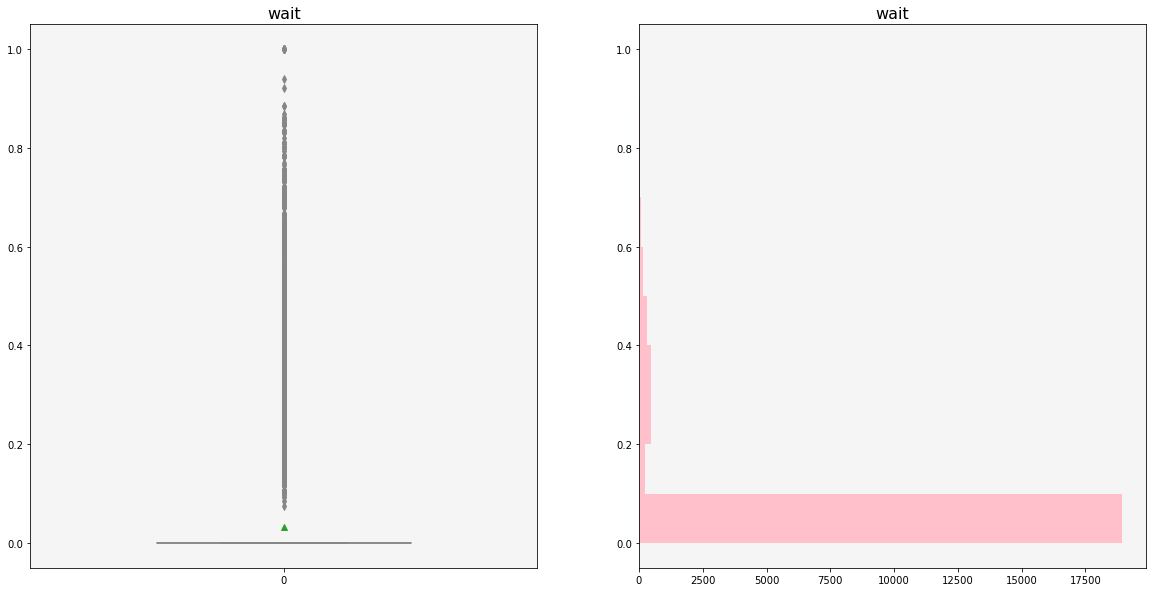

In [182]:
box_plot(reviews_vectorized, vector_cols[47])

The median for 'wait' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [183]:
reviews_vectorized[vector_cols[48]].describe()

count    20789.000000
mean         0.030216
std          0.109096
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: way, dtype: float64

In [184]:
reviews_vectorized[vector_cols[48]].skew()

4.075521358409976

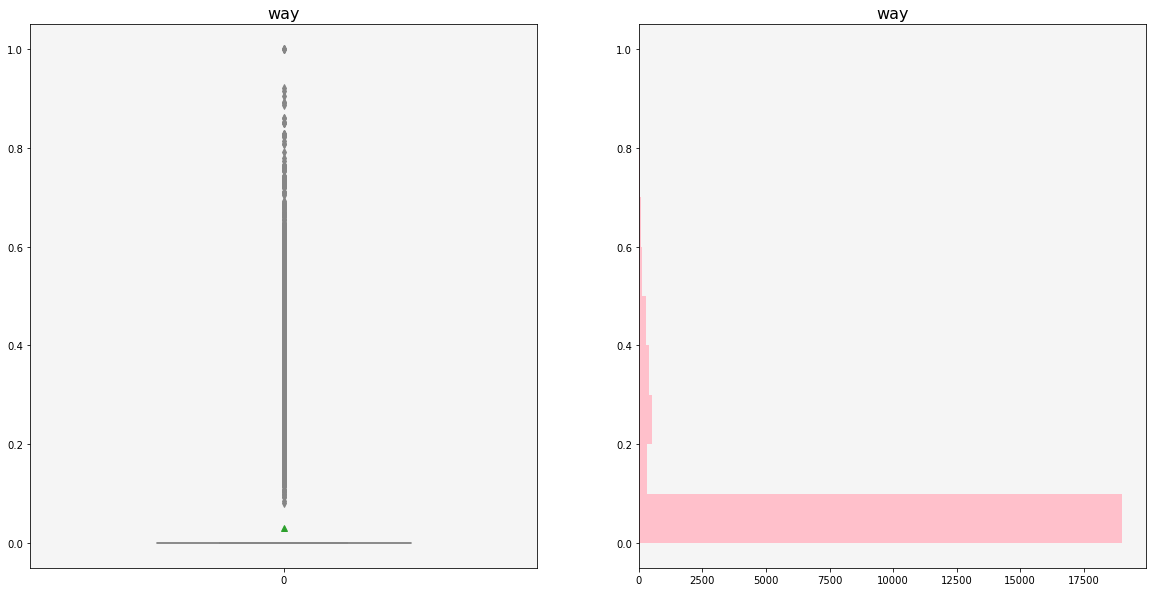

In [185]:
box_plot(reviews_vectorized, vector_cols[48])

The median for 'way' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [186]:
reviews_vectorized[vector_cols[48]].describe()

count    20789.000000
mean         0.030216
std          0.109096
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: way, dtype: float64

In [187]:
reviews_vectorized[vector_cols[48]].skew()

4.075521358409976

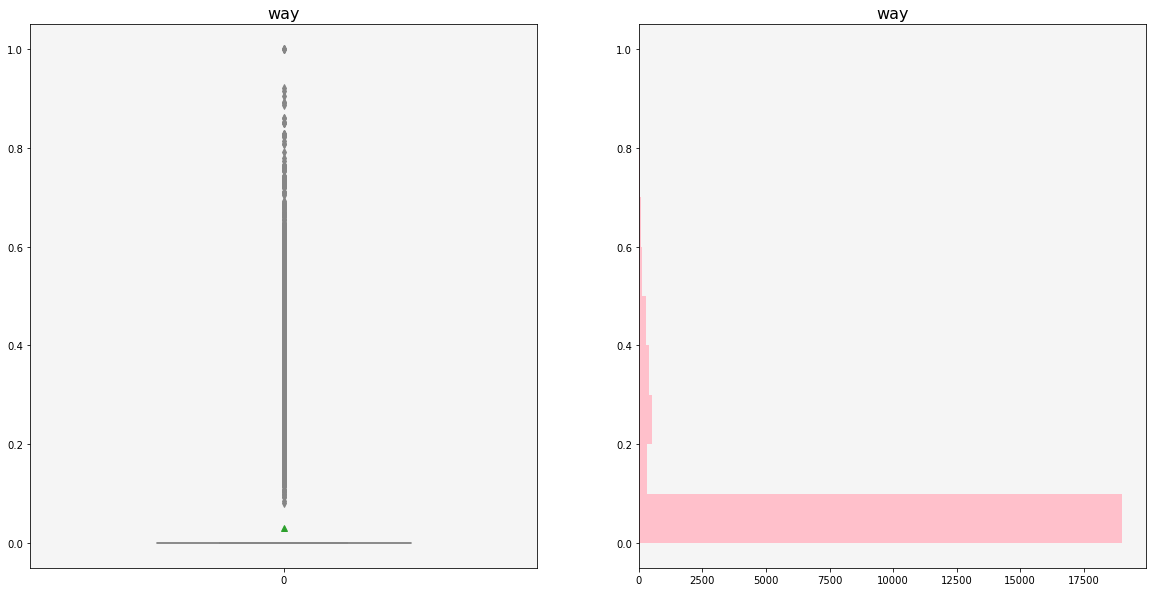

In [188]:
box_plot(reviews_vectorized, vector_cols[48])

The median for 'way' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

In [189]:
reviews_vectorized[vector_cols[49]].describe()

count    20789.000000
mean         0.038891
std          0.120864
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: went, dtype: float64

In [190]:
reviews_vectorized[vector_cols[49]].skew()

3.4682224139728612

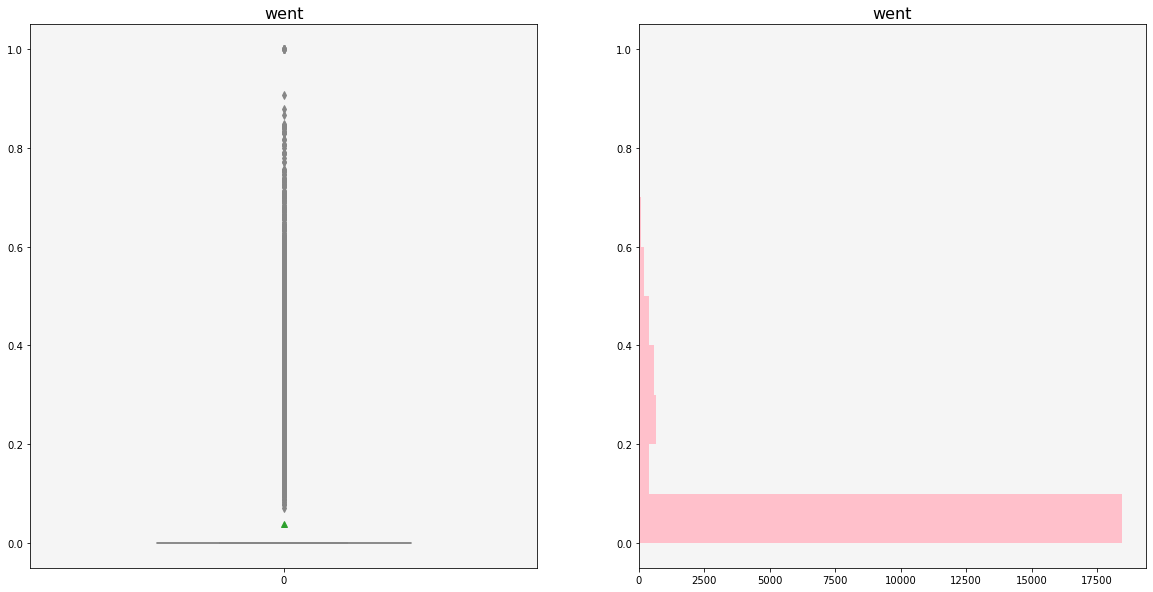

In [191]:
box_plot(reviews_vectorized, vector_cols[49])

The median for 'went' is 0, while the mean is offset from the median.  The data is highly positively skewed. Spread in the IQR is very small, with a large number of outliers. 

### Summary

The stars column did not need to be cleaned up of outliers as there are only values of 1-5 in the rows.  The largest number of rows had the value of five.  The column that the target was derived from (useful) needed to be pruned to get rid of extreme outliers, so rows were dropped that had greater than a 100 value.  The cool and funny columns were dropped because there were more zeroes than values greater than zero.  For the funny column, the maximum value was 35.  For the cool column, the maximum value was 303.  Neither had a great number of values over zero.  For the number of words column, rows were dropped that had values greater than 600.  The maximum number of words was 1,002.  For the number of characters column, rows were dropped with a value greater than 2,500.  The maximum number of characters was 4868.  

I also vectorized the text column, and graphed the results.  In addition I generated summary statistics.  Overall, there are no surprises here.  The data for each word was heavily skewed, and the medians were zero.  There were large numbers of outliers in each case.  

For risks following the EDA, having to drop the cool and funny columns reduces the number of yelp columns that I can feed into models.  This may have an impact on the scoring of the models.  There may also be limitations on how high a score can be achieved, as there are a large number of strings to parse.  

### Next steps

For proposed next steps, I will investigate vectorization of the data.  I will look into using TF-IDF or bag of words.  From there I will pass the vectorized data into several models to find the model with the best outcome.  A shortlist of models that I may investigate are: KNN, logistic regression, SVM, and random forest.  I may also look into convolutional neural networks.  Once I have identified the model with the best outcome I will tune the model, and generate metrics.  